### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
apptype = application_df.APPLICATION_TYPE.value_counts()
apptype

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

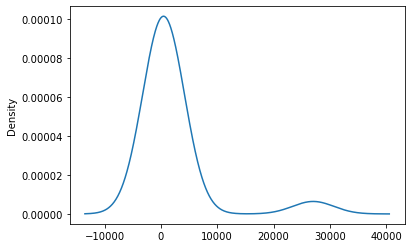

In [6]:
# Visualize the value counts of APPLICATION_TYPE
apptype.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(apptype[apptype < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C8210        1
C1245        1
C1248        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

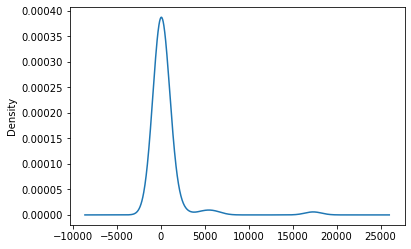

In [9]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(['IS_SUCCESSFUL'],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
len(X_train_scaled[0])
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4500      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#callback
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path = 'checkpoints/weights.{epoch:05d}.hdf5'
# Train the model
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)
fit_model = nn.fit(X_train_scaled, y_train, epochs=1000, callbacks=[cp_callback])

Epoch 1/1000
 62/804 [=>............................] - ETA: 0s - loss: 0.6720 - accuracy: 0.5856  
Epoch 00001: saving model to checkpoints/weights.00001.hdf5
179/804 [=====>........................] - ETA: 0s - loss: 0.6273 - accuracy: 0.6525
Epoch 00001: saving model to checkpoints/weights.00001.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 0.6128 - accuracy: 0.6716
Epoch 00001: saving model to checkpoints/weights.00001.hdf5
374/804 [============>.................] - ETA: 0s - loss: 0.6056 - accuracy: 0.6810
Epoch 00001: saving model to checkpoints/weights.00001.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.5989 - accuracy: 0.6895
Epoch 00001: saving model to checkpoints/weights.00001.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5947 - accuracy: 0.6942
Epoch 00001: saving model to checkpoints/weights.00001.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5913 - accuracy: 0.6980
Epoch 00001: saving model to c

472/804 [================>.............] - ETA: 0s - loss: 0.5465 - accuracy: 0.7304
Epoch 00007: saving model to checkpoints/weights.00007.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5468 - accuracy: 0.7303
Epoch 00007: saving model to checkpoints/weights.00007.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5474 - accuracy: 0.7300
Epoch 00007: saving model to checkpoints/weights.00007.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5475 - accuracy: 0.7300
Epoch 00007: saving model to checkpoints/weights.00007.hdf5
804/804 [==============================] - 1s 827us/step - loss: 0.5474 - accuracy: 0.7302
Epoch 8/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5405 - accuracy: 0.8125
Epoch 00008: saving model to checkpoints/weights.00008.hdf5
151/804 [====>.........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7303
Epoch 00008: saving model to checkpoints/weights.00008.hdf5
217/804 [=======>.........

804/804 [==============================] - 1s 755us/step - loss: 0.5473 - accuracy: 0.7347
Epoch 14/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4207 - accuracy: 0.8125
Epoch 00014: saving model to checkpoints/weights.00014.hdf5
127/804 [===>..........................] - ETA: 0s - loss: 0.5317 - accuracy: 0.7419
Epoch 00014: saving model to checkpoints/weights.00014.hdf5
190/804 [======>.......................] - ETA: 0s - loss: 0.5365 - accuracy: 0.7395
Epoch 00014: saving model to checkpoints/weights.00014.hdf5
317/804 [==========>...................] - ETA: 0s - loss: 0.5391 - accuracy: 0.7389
Epoch 00014: saving model to checkpoints/weights.00014.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.5399 - accuracy: 0.7386
Epoch 00014: saving model to checkpoints/weights.00014.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5409 - accuracy: 0.7381
Epoch 00014: saving model to checkpoints/weights.00014.hdf5
584/804 [================

267/804 [========>.....................] - ETA: 0s - loss: 0.5502 - accuracy: 0.7298
Epoch 00020: saving model to checkpoints/weights.00020.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5493 - accuracy: 0.7301
Epoch 00020: saving model to checkpoints/weights.00020.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.5490 - accuracy: 0.7302
Epoch 00020: saving model to checkpoints/weights.00020.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7303
Epoch 00020: saving model to checkpoints/weights.00020.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5481 - accuracy: 0.7306
Epoch 00020: saving model to checkpoints/weights.00020.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5473 - accuracy: 0.7312
Epoch 21/1000
  1/804 [..............................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8750
Epoch 00021: saving model to checkpoints/weights.00021.hdf5
 65/804 [=>..............

629/804 [======================>.......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7374
Epoch 00026: saving model to checkpoints/weights.00026.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7376
Epoch 00026: saving model to checkpoints/weights.00026.hdf5
804/804 [==============================] - 1s 729us/step - loss: 0.5376 - accuracy: 0.7377
Epoch 27/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5399 - accuracy: 0.7479
Epoch 00027: saving model to checkpoints/weights.00027.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5434 - accuracy: 0.7423
Epoch 00027: saving model to checkpoints/weights.00027.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7391
Epoch 00027: saving model to checkpoints/weights.00027.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.5426 - accuracy: 0.7390
Epoch 00027: saving model to checkpoints/weights.00027.hdf5
484/804 [================

151/804 [====>.........................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7328
Epoch 00033: saving model to checkpoints/weights.00033.hdf5
215/804 [=======>......................] - ETA: 0s - loss: 0.5392 - accuracy: 0.7310
Epoch 00033: saving model to checkpoints/weights.00033.hdf5
356/804 [============>.................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7312
Epoch 00033: saving model to checkpoints/weights.00033.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 0.5410 - accuracy: 0.7317
Epoch 00033: saving model to checkpoints/weights.00033.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5397 - accuracy: 0.7332
Epoch 00033: saving model to checkpoints/weights.00033.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7337
Epoch 00033: saving model to checkpoints/weights.00033.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5389 - accuracy: 0.7346
Epoch 00033: saving model to checkpoints/weig

529/804 [==================>...........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7457
Epoch 00039: saving model to checkpoints/weights.00039.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7450
Epoch 00039: saving model to checkpoints/weights.00039.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7439
Epoch 00039: saving model to checkpoints/weights.00039.hdf5
804/804 [==============================] - 1s 757us/step - loss: 0.5333 - accuracy: 0.7434
Epoch 40/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6161 - accuracy: 0.6250
Epoch 00040: saving model to checkpoints/weights.00040.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5448 - accuracy: 0.7277
Epoch 00040: saving model to checkpoints/weights.00040.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5427 - accuracy: 0.7300
Epoch 00040: saving model to checkpoints/weights.00040.hdf5
330/804 [===========>....

  1/804 [..............................] - ETA: 0s - loss: 0.5252 - accuracy: 0.7500
Epoch 00046: saving model to checkpoints/weights.00046.hdf5
 83/804 [==>...........................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7380
Epoch 00046: saving model to checkpoints/weights.00046.hdf5
189/804 [======>.......................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7378
Epoch 00046: saving model to checkpoints/weights.00046.hdf5
304/804 [==========>...................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7392
Epoch 00046: saving model to checkpoints/weights.00046.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7406
Epoch 00046: saving model to checkpoints/weights.00046.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7408
Epoch 00046: saving model to checkpoints/weights.00046.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7409
Epoch 00046: saving model to checkpoints/weig

340/804 [===========>..................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7427
Epoch 00052: saving model to checkpoints/weights.00052.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.5325 - accuracy: 0.7415
Epoch 00052: saving model to checkpoints/weights.00052.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7413
Epoch 00052: saving model to checkpoints/weights.00052.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7411
Epoch 00052: saving model to checkpoints/weights.00052.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5336 - accuracy: 0.7408
Epoch 00052: saving model to checkpoints/weights.00052.hdf5
804/804 [==============================] - 1s 817us/step - loss: 0.5338 - accuracy: 0.7407
Epoch 53/1000
 79/804 [=>............................] - ETA: 0s - loss: 0.5429 - accuracy: 0.7340
Epoch 00053: saving model to checkpoints/weights.00053.hdf5
145/804 [====>...........

751/804 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7421
Epoch 00058: saving model to checkpoints/weights.00058.hdf5
804/804 [==============================] - 1s 807us/step - loss: 0.5326 - accuracy: 0.7420
Epoch 59/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5505 - accuracy: 0.7812
Epoch 00059: saving model to checkpoints/weights.00059.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7370
Epoch 00059: saving model to checkpoints/weights.00059.hdf5
193/804 [======>.......................] - ETA: 0s - loss: 0.5368 - accuracy: 0.7356
Epoch 00059: saving model to checkpoints/weights.00059.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5378 - accuracy: 0.7356
Epoch 00059: saving model to checkpoints/weights.00059.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7369
Epoch 00059: saving model to checkpoints/weights.00059.hdf5
522/804 [================

199/804 [======>.......................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7484
Epoch 00065: saving model to checkpoints/weights.00065.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7490
Epoch 00065: saving model to checkpoints/weights.00065.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5281 - accuracy: 0.7487
Epoch 00065: saving model to checkpoints/weights.00065.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5289 - accuracy: 0.7474
Epoch 00065: saving model to checkpoints/weights.00065.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5295 - accuracy: 0.7466
Epoch 00065: saving model to checkpoints/weights.00065.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5303 - accuracy: 0.7454
Epoch 00065: saving model to checkpoints/weights.00065.hdf5
804/804 [==============================] - 1s 786us/step - loss: 0.5307 - accuracy: 0.7448
Epoch 66/1000
  1/804 [................

606/804 [=====================>........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7417
Epoch 00071: saving model to checkpoints/weights.00071.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7415
Epoch 00071: saving model to checkpoints/weights.00071.hdf5
804/804 [==============================] - 1s 748us/step - loss: 0.5330 - accuracy: 0.7411
Epoch 72/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5038 - accuracy: 0.7812
Epoch 00072: saving model to checkpoints/weights.00072.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5406 - accuracy: 0.7418
Epoch 00072: saving model to checkpoints/weights.00072.hdf5
165/804 [=====>........................] - ETA: 0s - loss: 0.5368 - accuracy: 0.7443
Epoch 00072: saving model to checkpoints/weights.00072.hdf5
265/804 [========>.....................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7441
Epoch 00072: saving model to checkpoints/weights.00072.hdf5
382/804 [=============>..

 76/804 [=>............................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7423
Epoch 00078: saving model to checkpoints/weights.00078.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7398
Epoch 00078: saving model to checkpoints/weights.00078.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5292 - accuracy: 0.7404
Epoch 00078: saving model to checkpoints/weights.00078.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7405
Epoch 00078: saving model to checkpoints/weights.00078.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7401
Epoch 00078: saving model to checkpoints/weights.00078.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7401
Epoch 00078: saving model to checkpoints/weights.00078.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5317 - accuracy: 0.7398
Epoch 00078: saving model to checkpoints/weig

399/804 [=============>................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7419
Epoch 00084: saving model to checkpoints/weights.00084.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5296 - accuracy: 0.7417
Epoch 00084: saving model to checkpoints/weights.00084.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5298 - accuracy: 0.7415
Epoch 00084: saving model to checkpoints/weights.00084.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5305 - accuracy: 0.7411
Epoch 00084: saving model to checkpoints/weights.00084.hdf5
804/804 [==============================] - 1s 771us/step - loss: 0.5308 - accuracy: 0.7410
Epoch 85/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5384 - accuracy: 0.7500
Epoch 00085: saving model to checkpoints/weights.00085.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7381
Epoch 00085: saving model to checkpoints/weights.00085.hdf5
205/804 [======>.........

804/804 [==============================] - 1s 951us/step - loss: 0.5318 - accuracy: 0.7406
Epoch 91/1000
  1/804 [..............................] - ETA: 1s - loss: 0.4339 - accuracy: 0.8438
Epoch 00091: saving model to checkpoints/weights.00091.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7462
Epoch 00091: saving model to checkpoints/weights.00091.hdf5
190/804 [======>.......................] - ETA: 0s - loss: 0.5277 - accuracy: 0.7456
Epoch 00091: saving model to checkpoints/weights.00091.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7442
Epoch 00091: saving model to checkpoints/weights.00091.hdf5
388/804 [=============>................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7440
Epoch 00091: saving model to checkpoints/weights.00091.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.5304 - accuracy: 0.7437
Epoch 00091: saving model to checkpoints/weights.00091.hdf5
614/804 [================

309/804 [==========>...................] - ETA: 0s - loss: 0.5263 - accuracy: 0.7426
Epoch 00097: saving model to checkpoints/weights.00097.hdf5
364/804 [============>.................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7426
Epoch 00097: saving model to checkpoints/weights.00097.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5277 - accuracy: 0.7425
Epoch 00097: saving model to checkpoints/weights.00097.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5283 - accuracy: 0.7425
Epoch 00097: saving model to checkpoints/weights.00097.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5291 - accuracy: 0.7423
Epoch 00097: saving model to checkpoints/weights.00097.hdf5
804/804 [==============================] - 1s 924us/step - loss: 0.5297 - accuracy: 0.7421
Epoch 98/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4823 - accuracy: 0.7500
Epoch 00098: saving model to checkpoints/weights.00098.hdf5
 55/804 [=>..............

629/804 [======================>.......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7432
Epoch 00103: saving model to checkpoints/weights.00103.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5309 - accuracy: 0.7426
Epoch 00103: saving model to checkpoints/weights.00103.hdf5
804/804 [==============================] - 1s 943us/step - loss: 0.5310 - accuracy: 0.7425
Epoch 104/1000
 59/804 [=>............................] - ETA: 0s - loss: 0.5511 - accuracy: 0.7224
Epoch 00104: saving model to checkpoints/weights.00104.hdf5
174/804 [=====>........................] - ETA: 0s - loss: 0.5435 - accuracy: 0.7318
Epoch 00104: saving model to checkpoints/weights.00104.hdf5
230/804 [=======>......................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7343
Epoch 00104: saving model to checkpoints/weights.00104.hdf5
353/804 [============>.................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7380
Epoch 00104: saving model to checkpoints/weights.00104.hdf5
472/804 [===============

141/804 [====>.........................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7277
Epoch 00110: saving model to checkpoints/weights.00110.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7291
Epoch 00110: saving model to checkpoints/weights.00110.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7307
Epoch 00110: saving model to checkpoints/weights.00110.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5387 - accuracy: 0.7317
Epoch 00110: saving model to checkpoints/weights.00110.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7330
Epoch 00110: saving model to checkpoints/weights.00110.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7333
Epoch 00110: saving model to checkpoints/weights.00110.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7342
Epoch 00110: saving model to checkpoints/weig

489/804 [=================>............] - ETA: 0s - loss: 0.5266 - accuracy: 0.7440
Epoch 00116: saving model to checkpoints/weights.00116.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5275 - accuracy: 0.7436
Epoch 00116: saving model to checkpoints/weights.00116.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5278 - accuracy: 0.7435
Epoch 00116: saving model to checkpoints/weights.00116.hdf5
804/804 [==============================] - 1s 794us/step - loss: 0.5284 - accuracy: 0.7432
Epoch 117/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6203 - accuracy: 0.6562
Epoch 00117: saving model to checkpoints/weights.00117.hdf5
130/804 [===>..........................] - ETA: 0s - loss: 0.5143 - accuracy: 0.7576
Epoch 00117: saving model to checkpoints/weights.00117.hdf5
170/804 [=====>........................] - ETA: 0s - loss: 0.5169 - accuracy: 0.7548
Epoch 00117: saving model to checkpoints/weights.00117.hdf5
303/804 [==========>....

  1/804 [..............................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7188
Epoch 00123: saving model to checkpoints/weights.00123.hdf5
 60/804 [=>............................] - ETA: 0s - loss: 0.5377 - accuracy: 0.7458
Epoch 00123: saving model to checkpoints/weights.00123.hdf5
195/804 [======>.......................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7447
Epoch 00123: saving model to checkpoints/weights.00123.hdf5
259/804 [========>.....................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7451
Epoch 00123: saving model to checkpoints/weights.00123.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.5326 - accuracy: 0.7449
Epoch 00123: saving model to checkpoints/weights.00123.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5330 - accuracy: 0.7441
Epoch 00123: saving model to checkpoints/weights.00123.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5336 - accuracy: 0.7427
Epoch 00123: saving model to checkpoints/weig

366/804 [============>.................] - ETA: 0s - loss: 0.5244 - accuracy: 0.7490
Epoch 00129: saving model to checkpoints/weights.00129.hdf5
429/804 [===============>..............] - ETA: 0s - loss: 0.5251 - accuracy: 0.7486
Epoch 00129: saving model to checkpoints/weights.00129.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5259 - accuracy: 0.7482
Epoch 00129: saving model to checkpoints/weights.00129.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7476
Epoch 00129: saving model to checkpoints/weights.00129.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7473
Epoch 00129: saving model to checkpoints/weights.00129.hdf5
804/804 [==============================] - 1s 813us/step - loss: 0.5268 - accuracy: 0.7469
Epoch 130/1000
 69/804 [=>............................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7478
Epoch 00130: saving model to checkpoints/weights.00130.hdf5
130/804 [===>...........

703/804 [=========================>....] - ETA: 0s - loss: 0.5310 - accuracy: 0.7418
Epoch 00135: saving model to checkpoints/weights.00135.hdf5
804/804 [==============================] - 1s 922us/step - loss: 0.5312 - accuracy: 0.7416
Epoch 136/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7812
Epoch 00136: saving model to checkpoints/weights.00136.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.7536
Epoch 00136: saving model to checkpoints/weights.00136.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5154 - accuracy: 0.7518
Epoch 00136: saving model to checkpoints/weights.00136.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5172 - accuracy: 0.7494
Epoch 00136: saving model to checkpoints/weights.00136.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5190 - accuracy: 0.7480
Epoch 00136: saving model to checkpoints/weights.00136.hdf5
539/804 [===============

234/804 [=======>......................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7391
Epoch 00142: saving model to checkpoints/weights.00142.hdf5
282/804 [=========>....................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7376
Epoch 00142: saving model to checkpoints/weights.00142.hdf5
418/804 [==============>...............] - ETA: 0s - loss: 0.5334 - accuracy: 0.7370
Epoch 00142: saving model to checkpoints/weights.00142.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5332 - accuracy: 0.7372
Epoch 00142: saving model to checkpoints/weights.00142.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5326 - accuracy: 0.7379
Epoch 00142: saving model to checkpoints/weights.00142.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7382
Epoch 00142: saving model to checkpoints/weights.00142.hdf5
804/804 [==============================] - 1s 807us/step - loss: 0.5323 - accuracy: 0.7386
Epoch 143/1000
  1/804 [...............

598/804 [=====================>........] - ETA: 0s - loss: 0.5292 - accuracy: 0.7432
Epoch 00148: saving model to checkpoints/weights.00148.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5293 - accuracy: 0.7431
Epoch 00148: saving model to checkpoints/weights.00148.hdf5
804/804 [==============================] - 1s 830us/step - loss: 0.5295 - accuracy: 0.7428
Epoch 149/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4737 - accuracy: 0.7812
Epoch 00149: saving model to checkpoints/weights.00149.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5028 - accuracy: 0.7631
Epoch 00149: saving model to checkpoints/weights.00149.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7512
Epoch 00149: saving model to checkpoints/weights.00149.hdf5
269/804 [=========>....................] - ETA: 0s - loss: 0.5196 - accuracy: 0.7482
Epoch 00149: saving model to checkpoints/weights.00149.hdf5
408/804 [==============>

 63/804 [=>............................] - ETA: 0s - loss: 0.5150 - accuracy: 0.7552
Epoch 00155: saving model to checkpoints/weights.00155.hdf5
167/804 [=====>........................] - ETA: 0s - loss: 0.5181 - accuracy: 0.7513
Epoch 00155: saving model to checkpoints/weights.00155.hdf5
227/804 [=======>......................] - ETA: 0s - loss: 0.5194 - accuracy: 0.7503
Epoch 00155: saving model to checkpoints/weights.00155.hdf5
354/804 [============>.................] - ETA: 0s - loss: 0.5224 - accuracy: 0.7475
Epoch 00155: saving model to checkpoints/weights.00155.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.5237 - accuracy: 0.7460
Epoch 00155: saving model to checkpoints/weights.00155.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5244 - accuracy: 0.7454
Epoch 00155: saving model to checkpoints/weights.00155.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5252 - accuracy: 0.7448
Epoch 00155: saving model to checkpoints/weig

431/804 [===============>..............] - ETA: 0s - loss: 0.5252 - accuracy: 0.7437
Epoch 00161: saving model to checkpoints/weights.00161.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5258 - accuracy: 0.7434
Epoch 00161: saving model to checkpoints/weights.00161.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5260 - accuracy: 0.7434
Epoch 00161: saving model to checkpoints/weights.00161.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5262 - accuracy: 0.7434
Epoch 00161: saving model to checkpoints/weights.00161.hdf5
804/804 [==============================] - 1s 795us/step - loss: 0.5265 - accuracy: 0.7433
Epoch 162/1000
  1/804 [..............................] - ETA: 1s - loss: 0.7091 - accuracy: 0.6562
Epoch 00162: saving model to checkpoints/weights.00162.hdf5
128/804 [===>..........................] - ETA: 0s - loss: 0.5444 - accuracy: 0.7246
Epoch 00162: saving model to checkpoints/weights.00162.hdf5
189/804 [======>........

804/804 [==============================] - 1s 823us/step - loss: 0.5305 - accuracy: 0.7375
Epoch 168/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6614 - accuracy: 0.5938
Epoch 00168: saving model to checkpoints/weights.00168.hdf5
123/804 [===>..........................] - ETA: 0s - loss: 0.5474 - accuracy: 0.7316
Epoch 00168: saving model to checkpoints/weights.00168.hdf5
175/804 [=====>........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7338
Epoch 00168: saving model to checkpoints/weights.00168.hdf5
304/804 [==========>...................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7373
Epoch 00168: saving model to checkpoints/weights.00168.hdf5
363/804 [============>.................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7382
Epoch 00168: saving model to checkpoints/weights.00168.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.5345 - accuracy: 0.7394
Epoch 00168: saving model to checkpoints/weights.00168.hdf5
629/804 [===============

242/804 [========>.....................] - ETA: 0s - loss: 0.5233 - accuracy: 0.7485
Epoch 00174: saving model to checkpoints/weights.00174.hdf5
379/804 [=============>................] - ETA: 0s - loss: 0.5240 - accuracy: 0.7471
Epoch 00174: saving model to checkpoints/weights.00174.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5244 - accuracy: 0.7467
Epoch 00174: saving model to checkpoints/weights.00174.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5256 - accuracy: 0.7456
Epoch 00174: saving model to checkpoints/weights.00174.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5261 - accuracy: 0.7452
Epoch 00174: saving model to checkpoints/weights.00174.hdf5
804/804 [==============================] - 1s 785us/step - loss: 0.5273 - accuracy: 0.7442
Epoch 175/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5866 - accuracy: 0.7188
Epoch 00175: saving model to checkpoints/weights.00175.hdf5
 52/804 [>..............

612/804 [=====================>........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7428
Epoch 00180: saving model to checkpoints/weights.00180.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5285 - accuracy: 0.7430
Epoch 00180: saving model to checkpoints/weights.00180.hdf5
804/804 [==============================] - 1s 740us/step - loss: 0.5286 - accuracy: 0.7430
Epoch 181/1000
 74/804 [=>............................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7370
Epoch 00181: saving model to checkpoints/weights.00181.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7436
Epoch 00181: saving model to checkpoints/weights.00181.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5290 - accuracy: 0.7460
Epoch 00181: saving model to checkpoints/weights.00181.hdf5
355/804 [============>.................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7463
Epoch 00181: saving model to checkpoints/weights.00181.hdf5
415/804 [==============>

141/804 [====>.........................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7489
Epoch 00187: saving model to checkpoints/weights.00187.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5284 - accuracy: 0.7489
Epoch 00187: saving model to checkpoints/weights.00187.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7484
Epoch 00187: saving model to checkpoints/weights.00187.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5279 - accuracy: 0.7479
Epoch 00187: saving model to checkpoints/weights.00187.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5281 - accuracy: 0.7468
Epoch 00187: saving model to checkpoints/weights.00187.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5282 - accuracy: 0.7464
Epoch 00187: saving model to checkpoints/weights.00187.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7460
Epoch 00187: saving model to checkpoints/weig

501/804 [=================>............] - ETA: 0s - loss: 0.5268 - accuracy: 0.7464
Epoch 00193: saving model to checkpoints/weights.00193.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5273 - accuracy: 0.7452
Epoch 00193: saving model to checkpoints/weights.00193.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5276 - accuracy: 0.7446
Epoch 00193: saving model to checkpoints/weights.00193.hdf5
804/804 [==============================] - 1s 920us/step - loss: 0.5277 - accuracy: 0.7444
Epoch 194/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4820 - accuracy: 0.7812
Epoch 00194: saving model to checkpoints/weights.00194.hdf5
125/804 [===>..........................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7459
Epoch 00194: saving model to checkpoints/weights.00194.hdf5
179/804 [=====>........................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7458
Epoch 00194: saving model to checkpoints/weights.00194.hdf5
306/804 [==========>....

  1/804 [..............................] - ETA: 0s - loss: 0.5583 - accuracy: 0.6562
Epoch 00200: saving model to checkpoints/weights.00200.hdf5
 46/804 [>.............................] - ETA: 0s - loss: 0.5418 - accuracy: 0.7304
Epoch 00200: saving model to checkpoints/weights.00200.hdf5
183/804 [=====>........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7386
Epoch 00200: saving model to checkpoints/weights.00200.hdf5
248/804 [========>.....................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7409
Epoch 00200: saving model to checkpoints/weights.00200.hdf5
391/804 [=============>................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7426
Epoch 00200: saving model to checkpoints/weights.00200.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 0.5276 - accuracy: 0.7427
Epoch 00200: saving model to checkpoints/weights.00200.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5279 - accuracy: 0.7423
Epoch 00200: saving model to checkpoints/weig

311/804 [==========>...................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7483
Epoch 00206: saving model to checkpoints/weights.00206.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.5262 - accuracy: 0.7482
Epoch 00206: saving model to checkpoints/weights.00206.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5265 - accuracy: 0.7478
Epoch 00206: saving model to checkpoints/weights.00206.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5272 - accuracy: 0.7470
Epoch 00206: saving model to checkpoints/weights.00206.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7461
Epoch 00206: saving model to checkpoints/weights.00206.hdf5
804/804 [==============================] - 1s 811us/step - loss: 0.5279 - accuracy: 0.7458
Epoch 207/1000
 74/804 [=>............................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7347
Epoch 00207: saving model to checkpoints/weights.00207.hdf5
135/804 [====>..........

753/804 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.7380
Epoch 00212: saving model to checkpoints/weights.00212.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7382
Epoch 213/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4041 - accuracy: 0.8750
Epoch 00213: saving model to checkpoints/weights.00213.hdf5
122/804 [===>..........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7400
Epoch 00213: saving model to checkpoints/weights.00213.hdf5
188/804 [======>.......................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7407
Epoch 00213: saving model to checkpoints/weights.00213.hdf5
327/804 [===========>..................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7419
Epoch 00213: saving model to checkpoints/weights.00213.hdf5
394/804 [=============>................] - ETA: 0s - loss: 0.5303 - accuracy: 0.7427
Epoch 00213: saving model to checkpoints/weights.00213.hdf5
515/804 [=================

184/804 [=====>........................] - ETA: 0s - loss: 0.5209 - accuracy: 0.7471
Epoch 00219: saving model to checkpoints/weights.00219.hdf5
321/804 [==========>...................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7442
Epoch 00219: saving model to checkpoints/weights.00219.hdf5
383/804 [=============>................] - ETA: 0s - loss: 0.5245 - accuracy: 0.7435
Epoch 00219: saving model to checkpoints/weights.00219.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.5261 - accuracy: 0.7427
Epoch 00219: saving model to checkpoints/weights.00219.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5273 - accuracy: 0.7421
Epoch 00219: saving model to checkpoints/weights.00219.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7419
Epoch 00219: saving model to checkpoints/weights.00219.hdf5
804/804 [==============================] - 1s 810us/step - loss: 0.5281 - accuracy: 0.7418
Epoch 220/1000
  1/804 [...............

599/804 [=====================>........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7347
Epoch 00225: saving model to checkpoints/weights.00225.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5345 - accuracy: 0.7351
Epoch 00225: saving model to checkpoints/weights.00225.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5340 - accuracy: 0.7356
Epoch 00225: saving model to checkpoints/weights.00225.hdf5
804/804 [==============================] - 1s 761us/step - loss: 0.5336 - accuracy: 0.7361
Epoch 226/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7490
Epoch 00226: saving model to checkpoints/weights.00226.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.7471
Epoch 00226: saving model to checkpoints/weights.00226.hdf5
286/804 [=========>....................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7445
Epoch 00226: saving model to checkpoints/weights.00226.hdf5
355/804 [============>..

  1/804 [..............................] - ETA: 0s - loss: 0.5913 - accuracy: 0.7500
Epoch 00232: saving model to checkpoints/weights.00232.hdf5
154/804 [====>.........................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7427
Epoch 00232: saving model to checkpoints/weights.00232.hdf5
222/804 [=======>......................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7437
Epoch 00232: saving model to checkpoints/weights.00232.hdf5
366/804 [============>.................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7447
Epoch 00232: saving model to checkpoints/weights.00232.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 0.5297 - accuracy: 0.7447
Epoch 00232: saving model to checkpoints/weights.00232.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7443
Epoch 00232: saving model to checkpoints/weights.00232.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5291 - accuracy: 0.7440
Epoch 00232: saving model to checkpoints/weig

434/804 [===============>..............] - ETA: 0s - loss: 0.5291 - accuracy: 0.7405
Epoch 00238: saving model to checkpoints/weights.00238.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.5290 - accuracy: 0.7404
Epoch 00238: saving model to checkpoints/weights.00238.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5292 - accuracy: 0.7403
Epoch 00238: saving model to checkpoints/weights.00238.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5294 - accuracy: 0.7402
Epoch 00238: saving model to checkpoints/weights.00238.hdf5
804/804 [==============================] - 1s 924us/step - loss: 0.5295 - accuracy: 0.7403
Epoch 239/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6301 - accuracy: 0.6875
Epoch 00239: saving model to checkpoints/weights.00239.hdf5
135/804 [====>.........................] - ETA: 0s - loss: 0.5148 - accuracy: 0.7539
Epoch 00239: saving model to checkpoints/weights.00239.hdf5
194/804 [======>........

804/804 [==============================] - 1s 758us/step - loss: 0.5208 - accuracy: 0.7443
Epoch 245/1000
  1/804 [..............................] - ETA: 1s - loss: 0.6264 - accuracy: 0.6250
Epoch 00245: saving model to checkpoints/weights.00245.hdf5
103/804 [==>...........................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7498
Epoch 00245: saving model to checkpoints/weights.00245.hdf5
224/804 [=======>......................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7456
Epoch 00245: saving model to checkpoints/weights.00245.hdf5
282/804 [=========>....................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7447
Epoch 00245: saving model to checkpoints/weights.00245.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.5277 - accuracy: 0.7444
Epoch 00245: saving model to checkpoints/weights.00245.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5276 - accuracy: 0.7444
Epoch 00245: saving model to checkpoints/weights.00245.hdf5
619/804 [===============

293/804 [=========>....................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7397
Epoch 00251: saving model to checkpoints/weights.00251.hdf5
360/804 [============>.................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7413
Epoch 00251: saving model to checkpoints/weights.00251.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5230 - accuracy: 0.7428
Epoch 00251: saving model to checkpoints/weights.00251.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5235 - accuracy: 0.7430
Epoch 00251: saving model to checkpoints/weights.00251.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5239 - accuracy: 0.7431
Epoch 00251: saving model to checkpoints/weights.00251.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5246 - accuracy: 0.7431
Epoch 00251: saving model to checkpoints/weights.00251.hdf5
804/804 [==============================] - 1s 713us/step - loss: 0.5247 - accuracy: 0.7430
Epoch 252/1000
 80/804 [=>.............

669/804 [=======================>......] - ETA: 0s - loss: 0.5274 - accuracy: 0.7454
Epoch 00257: saving model to checkpoints/weights.00257.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5275 - accuracy: 0.7452
Epoch 00257: saving model to checkpoints/weights.00257.hdf5
804/804 [==============================] - 1s 763us/step - loss: 0.5276 - accuracy: 0.7449
Epoch 258/1000
 65/804 [=>............................] - ETA: 0s - loss: 0.5085 - accuracy: 0.7564
Epoch 00258: saving model to checkpoints/weights.00258.hdf5
118/804 [===>..........................] - ETA: 0s - loss: 0.5133 - accuracy: 0.7534
Epoch 00258: saving model to checkpoints/weights.00258.hdf5
251/804 [========>.....................] - ETA: 0s - loss: 0.5188 - accuracy: 0.7494
Epoch 00258: saving model to checkpoints/weights.00258.hdf5
371/804 [============>.................] - ETA: 0s - loss: 0.5210 - accuracy: 0.7477
Epoch 00258: saving model to checkpoints/weights.00258.hdf5
433/804 [===============

147/804 [====>.........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7528
Epoch 00264: saving model to checkpoints/weights.00264.hdf5
215/804 [=======>......................] - ETA: 0s - loss: 0.5178 - accuracy: 0.7512
Epoch 00264: saving model to checkpoints/weights.00264.hdf5
283/804 [=========>....................] - ETA: 0s - loss: 0.5184 - accuracy: 0.7502
Epoch 00264: saving model to checkpoints/weights.00264.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 0.5192 - accuracy: 0.7491
Epoch 00264: saving model to checkpoints/weights.00264.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5198 - accuracy: 0.7486
Epoch 00264: saving model to checkpoints/weights.00264.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5211 - accuracy: 0.7475
Epoch 00264: saving model to checkpoints/weights.00264.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5216 - accuracy: 0.7471
Epoch 00264: saving model to checkpoints/weig

522/804 [==================>...........] - ETA: 0s - loss: 0.5252 - accuracy: 0.7474
Epoch 00270: saving model to checkpoints/weights.00270.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5254 - accuracy: 0.7469
Epoch 00270: saving model to checkpoints/weights.00270.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5257 - accuracy: 0.7460
Epoch 00270: saving model to checkpoints/weights.00270.hdf5
804/804 [==============================] - 1s 850us/step - loss: 0.5259 - accuracy: 0.7455
Epoch 271/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7812
Epoch 00271: saving model to checkpoints/weights.00271.hdf5
 60/804 [=>............................] - ETA: 0s - loss: 0.5092 - accuracy: 0.7589
Epoch 00271: saving model to checkpoints/weights.00271.hdf5
192/804 [======>.......................] - ETA: 0s - loss: 0.5174 - accuracy: 0.7523
Epoch 00271: saving model to checkpoints/weights.00271.hdf5
309/804 [==========>....

Epoch 277/1000
 58/804 [=>............................] - ETA: 0s - loss: 0.5587 - accuracy: 0.7417
Epoch 00277: saving model to checkpoints/weights.00277.hdf5
174/804 [=====>........................] - ETA: 0s - loss: 0.5394 - accuracy: 0.7464
Epoch 00277: saving model to checkpoints/weights.00277.hdf5
254/804 [========>.....................] - ETA: 0s - loss: 0.5363 - accuracy: 0.7457
Epoch 00277: saving model to checkpoints/weights.00277.hdf5
377/804 [=============>................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7448
Epoch 00277: saving model to checkpoints/weights.00277.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.5330 - accuracy: 0.7446
Epoch 00277: saving model to checkpoints/weights.00277.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7445
Epoch 00277: saving model to checkpoints/weights.00277.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7441
Epoch 00277: saving model to c

411/804 [==============>...............] - ETA: 0s - loss: 0.5339 - accuracy: 0.7350
Epoch 00283: saving model to checkpoints/weights.00283.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7364
Epoch 00283: saving model to checkpoints/weights.00283.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7369
Epoch 00283: saving model to checkpoints/weights.00283.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5314 - accuracy: 0.7378
Epoch 00283: saving model to checkpoints/weights.00283.hdf5
804/804 [==============================] - 1s 763us/step - loss: 0.5312 - accuracy: 0.7381
Epoch 284/1000
 59/804 [=>............................] - ETA: 0s - loss: 0.4827 - accuracy: 0.7804
Epoch 00284: saving model to checkpoints/weights.00284.hdf5
110/804 [===>..........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.7721
Epoch 00284: saving model to checkpoints/weights.00284.hdf5
248/804 [========>......

804/804 [==============================] - 1s 728us/step - loss: 0.5302 - accuracy: 0.7430
Epoch 290/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5875 - accuracy: 0.6562
Epoch 00290: saving model to checkpoints/weights.00290.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7384
Epoch 00290: saving model to checkpoints/weights.00290.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5262 - accuracy: 0.7392
Epoch 00290: saving model to checkpoints/weights.00290.hdf5
341/804 [===========>..................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7398
Epoch 00290: saving model to checkpoints/weights.00290.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5272 - accuracy: 0.7401
Epoch 00290: saving model to checkpoints/weights.00290.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5278 - accuracy: 0.7405
Epoch 00290: saving model to checkpoints/weights.00290.hdf5
610/804 [===============

271/804 [=========>....................] - ETA: 0s - loss: 0.5174 - accuracy: 0.7502
Epoch 00296: saving model to checkpoints/weights.00296.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 0.5197 - accuracy: 0.7480
Epoch 00296: saving model to checkpoints/weights.00296.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5205 - accuracy: 0.7472
Epoch 00296: saving model to checkpoints/weights.00296.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5212 - accuracy: 0.7467
Epoch 00296: saving model to checkpoints/weights.00296.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5225 - accuracy: 0.7458
Epoch 00296: saving model to checkpoints/weights.00296.hdf5
804/804 [==============================] - 1s 728us/step - loss: 0.5234 - accuracy: 0.7453
Epoch 297/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4189 - accuracy: 0.8125
Epoch 00297: saving model to checkpoints/weights.00297.hdf5
 66/804 [=>.............

644/804 [=======================>......] - ETA: 0s - loss: 0.5267 - accuracy: 0.7416
Epoch 00302: saving model to checkpoints/weights.00302.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5271 - accuracy: 0.7416
Epoch 00302: saving model to checkpoints/weights.00302.hdf5
804/804 [==============================] - 1s 715us/step - loss: 0.5271 - accuracy: 0.7417
Epoch 303/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5326 - accuracy: 0.7451
Epoch 00303: saving model to checkpoints/weights.00303.hdf5
145/804 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7427
Epoch 00303: saving model to checkpoints/weights.00303.hdf5
289/804 [=========>....................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7429
Epoch 00303: saving model to checkpoints/weights.00303.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7429
Epoch 00303: saving model to checkpoints/weights.00303.hdf5
420/804 [==============>

146/804 [====>.........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.7498
Epoch 00309: saving model to checkpoints/weights.00309.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5232 - accuracy: 0.7494
Epoch 00309: saving model to checkpoints/weights.00309.hdf5
356/804 [============>.................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7468
Epoch 00309: saving model to checkpoints/weights.00309.hdf5
423/804 [==============>...............] - ETA: 0s - loss: 0.5234 - accuracy: 0.7461
Epoch 00309: saving model to checkpoints/weights.00309.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5237 - accuracy: 0.7457
Epoch 00309: saving model to checkpoints/weights.00309.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5241 - accuracy: 0.7453
Epoch 00309: saving model to checkpoints/weights.00309.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5243 - accuracy: 0.7451
Epoch 00309: saving model to checkpoints/weig

490/804 [=================>............] - ETA: 0s - loss: 0.5265 - accuracy: 0.7453
Epoch 00315: saving model to checkpoints/weights.00315.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5264 - accuracy: 0.7452
Epoch 00315: saving model to checkpoints/weights.00315.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5265 - accuracy: 0.7450
Epoch 00315: saving model to checkpoints/weights.00315.hdf5
804/804 [==============================] - 1s 817us/step - loss: 0.5267 - accuracy: 0.7447
Epoch 316/1000
  1/804 [..............................] - ETA: 1s - loss: 0.4521 - accuracy: 0.7500
Epoch 00316: saving model to checkpoints/weights.00316.hdf5
131/804 [===>..........................] - ETA: 0s - loss: 0.5318 - accuracy: 0.7351
Epoch 00316: saving model to checkpoints/weights.00316.hdf5
192/804 [======>.......................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7360
Epoch 00316: saving model to checkpoints/weights.00316.hdf5
318/804 [==========>....

  1/804 [..............................] - ETA: 0s - loss: 0.4147 - accuracy: 0.8750
Epoch 00322: saving model to checkpoints/weights.00322.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7388
Epoch 00322: saving model to checkpoints/weights.00322.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7428
Epoch 00322: saving model to checkpoints/weights.00322.hdf5
270/804 [=========>....................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7429
Epoch 00322: saving model to checkpoints/weights.00322.hdf5
413/804 [==============>...............] - ETA: 0s - loss: 0.5282 - accuracy: 0.7432
Epoch 00322: saving model to checkpoints/weights.00322.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5283 - accuracy: 0.7432
Epoch 00322: saving model to checkpoints/weights.00322.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7431
Epoch 00322: saving model to checkpoints/weig

326/804 [===========>..................] - ETA: 0s - loss: 0.5164 - accuracy: 0.7497
Epoch 00328: saving model to checkpoints/weights.00328.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.5184 - accuracy: 0.7487
Epoch 00328: saving model to checkpoints/weights.00328.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5192 - accuracy: 0.7481
Epoch 00328: saving model to checkpoints/weights.00328.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5205 - accuracy: 0.7470
Epoch 00328: saving model to checkpoints/weights.00328.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5210 - accuracy: 0.7467
Epoch 00328: saving model to checkpoints/weights.00328.hdf5
804/804 [==============================] - 1s 772us/step - loss: 0.5216 - accuracy: 0.7463
Epoch 329/1000
 75/804 [=>............................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7492
Epoch 00329: saving model to checkpoints/weights.00329.hdf5
137/804 [====>..........

730/804 [==========================>...] - ETA: 0s - loss: 0.5342 - accuracy: 0.7385
Epoch 00334: saving model to checkpoints/weights.00334.hdf5
804/804 [==============================] - 1s 762us/step - loss: 0.5337 - accuracy: 0.7390
Epoch 335/1000
  1/804 [..............................] - ETA: 1s - loss: 0.6340 - accuracy: 0.6875
Epoch 00335: saving model to checkpoints/weights.00335.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7481
Epoch 00335: saving model to checkpoints/weights.00335.hdf5
211/804 [======>.......................] - ETA: 0s - loss: 0.5173 - accuracy: 0.7475
Epoch 00335: saving model to checkpoints/weights.00335.hdf5
323/804 [===========>..................] - ETA: 0s - loss: 0.5207 - accuracy: 0.7456
Epoch 00335: saving model to checkpoints/weights.00335.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5215 - accuracy: 0.7454
Epoch 00335: saving model to checkpoints/weights.00335.hdf5
542/804 [===============

187/804 [=====>........................] - ETA: 0s - loss: 0.5214 - accuracy: 0.7532
Epoch 00341: saving model to checkpoints/weights.00341.hdf5
306/804 [==========>...................] - ETA: 0s - loss: 0.5228 - accuracy: 0.7510
Epoch 00341: saving model to checkpoints/weights.00341.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.5241 - accuracy: 0.7492
Epoch 00341: saving model to checkpoints/weights.00341.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.5245 - accuracy: 0.7486
Epoch 00341: saving model to checkpoints/weights.00341.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5254 - accuracy: 0.7475
Epoch 00341: saving model to checkpoints/weights.00341.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7470
Epoch 00341: saving model to checkpoints/weights.00341.hdf5
804/804 [==============================] - 1s 817us/step - loss: 0.5260 - accuracy: 0.7463
Epoch 342/1000
  1/804 [...............

578/804 [====================>.........] - ETA: 0s - loss: 0.5273 - accuracy: 0.7426
Epoch 00347: saving model to checkpoints/weights.00347.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5275 - accuracy: 0.7425
Epoch 00347: saving model to checkpoints/weights.00347.hdf5
804/804 [==============================] - 1s 884us/step - loss: 0.5277 - accuracy: 0.7425
Epoch 348/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5517 - accuracy: 0.7500
Epoch 00348: saving model to checkpoints/weights.00348.hdf5
 62/804 [=>............................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7366
Epoch 00348: saving model to checkpoints/weights.00348.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7432
Epoch 00348: saving model to checkpoints/weights.00348.hdf5
261/804 [========>.....................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7437
Epoch 00348: saving model to checkpoints/weights.00348.hdf5
397/804 [=============>.

 77/804 [=>............................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7409
Epoch 00354: saving model to checkpoints/weights.00354.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7406
Epoch 00354: saving model to checkpoints/weights.00354.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7423
Epoch 00354: saving model to checkpoints/weights.00354.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7426
Epoch 00354: saving model to checkpoints/weights.00354.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5248 - accuracy: 0.7429
Epoch 00354: saving model to checkpoints/weights.00354.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5249 - accuracy: 0.7429
Epoch 00354: saving model to checkpoints/weights.00354.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5253 - accuracy: 0.7427
Epoch 00354: saving model to checkpoints/weig

422/804 [==============>...............] - ETA: 0s - loss: 0.5261 - accuracy: 0.7420
Epoch 00360: saving model to checkpoints/weights.00360.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5261 - accuracy: 0.7423
Epoch 00360: saving model to checkpoints/weights.00360.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5258 - accuracy: 0.7430
Epoch 00360: saving model to checkpoints/weights.00360.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5257 - accuracy: 0.7432
Epoch 00360: saving model to checkpoints/weights.00360.hdf5
804/804 [==============================] - 1s 716us/step - loss: 0.5257 - accuracy: 0.7433
Epoch 361/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5562 - accuracy: 0.7188
Epoch 00361: saving model to checkpoints/weights.00361.hdf5
147/804 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7493
Epoch 00361: saving model to checkpoints/weights.00361.hdf5
212/804 [======>........

804/804 [==============================] - 1s 798us/step - loss: 0.5239 - accuracy: 0.7458
Epoch 367/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7188
Epoch 00367: saving model to checkpoints/weights.00367.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7362
Epoch 00367: saving model to checkpoints/weights.00367.hdf5
216/804 [=======>......................] - ETA: 0s - loss: 0.5237 - accuracy: 0.7427
Epoch 00367: saving model to checkpoints/weights.00367.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7425
Epoch 00367: saving model to checkpoints/weights.00367.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 0.5249 - accuracy: 0.7425
Epoch 00367: saving model to checkpoints/weights.00367.hdf5
503/804 [=================>............] - ETA: 0s - loss: 0.5254 - accuracy: 0.7425
Epoch 00367: saving model to checkpoints/weights.00367.hdf5
565/804 [===============

256/804 [========>.....................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7426
Epoch 00373: saving model to checkpoints/weights.00373.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5257 - accuracy: 0.7442
Epoch 00373: saving model to checkpoints/weights.00373.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.5250 - accuracy: 0.7448
Epoch 00373: saving model to checkpoints/weights.00373.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5247 - accuracy: 0.7450
Epoch 00373: saving model to checkpoints/weights.00373.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5248 - accuracy: 0.7448
Epoch 00373: saving model to checkpoints/weights.00373.hdf5
804/804 [==============================] - 1s 860us/step - loss: 0.5251 - accuracy: 0.7445
Epoch 374/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4527 - accuracy: 0.7812
Epoch 00374: saving model to checkpoints/weights.00374.hdf5
 65/804 [=>.............

640/804 [======================>.......] - ETA: 0s - loss: 0.5253 - accuracy: 0.7434
Epoch 00379: saving model to checkpoints/weights.00379.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5253 - accuracy: 0.7436
Epoch 00379: saving model to checkpoints/weights.00379.hdf5
804/804 [==============================] - 1s 729us/step - loss: 0.5254 - accuracy: 0.7436
Epoch 380/1000
 71/804 [=>............................] - ETA: 0s - loss: 0.5021 - accuracy: 0.7671
Epoch 00380: saving model to checkpoints/weights.00380.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.7582
Epoch 00380: saving model to checkpoints/weights.00380.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5204 - accuracy: 0.7508
Epoch 00380: saving model to checkpoints/weights.00380.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7492
Epoch 00380: saving model to checkpoints/weights.00380.hdf5
410/804 [==============>

138/804 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7509
Epoch 00386: saving model to checkpoints/weights.00386.hdf5
199/804 [======>.......................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7500
Epoch 00386: saving model to checkpoints/weights.00386.hdf5
338/804 [===========>..................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7479
Epoch 00386: saving model to checkpoints/weights.00386.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.5279 - accuracy: 0.7465
Epoch 00386: saving model to checkpoints/weights.00386.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5281 - accuracy: 0.7455
Epoch 00386: saving model to checkpoints/weights.00386.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5281 - accuracy: 0.7451
Epoch 00386: saving model to checkpoints/weights.00386.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5281 - accuracy: 0.7444
Epoch 00386: saving model to checkpoints/weig

515/804 [==================>...........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7371
Epoch 00392: saving model to checkpoints/weights.00392.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7379
Epoch 00392: saving model to checkpoints/weights.00392.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7391
Epoch 00392: saving model to checkpoints/weights.00392.hdf5
804/804 [==============================] - 1s 786us/step - loss: 0.5298 - accuracy: 0.7397
Epoch 393/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4250 - accuracy: 0.7812
Epoch 00393: saving model to checkpoints/weights.00393.hdf5
 61/804 [=>............................] - ETA: 0s - loss: 0.5332 - accuracy: 0.7567
Epoch 00393: saving model to checkpoints/weights.00393.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7505
Epoch 00393: saving model to checkpoints/weights.00393.hdf5
332/804 [===========>...

  1/804 [..............................] - ETA: 0s - loss: 0.5043 - accuracy: 0.7188
Epoch 00399: saving model to checkpoints/weights.00399.hdf5
 53/804 [>.............................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7264
Epoch 00399: saving model to checkpoints/weights.00399.hdf5
175/804 [=====>........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7375
Epoch 00399: saving model to checkpoints/weights.00399.hdf5
295/804 [==========>...................] - ETA: 0s - loss: 0.5248 - accuracy: 0.7397
Epoch 00399: saving model to checkpoints/weights.00399.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7396
Epoch 00399: saving model to checkpoints/weights.00399.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5270 - accuracy: 0.7395
Epoch 00399: saving model to checkpoints/weights.00399.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5277 - accuracy: 0.7402
Epoch 00399: saving model to checkpoints/weig

329/804 [===========>..................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7436
Epoch 00405: saving model to checkpoints/weights.00405.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5231 - accuracy: 0.7439
Epoch 00405: saving model to checkpoints/weights.00405.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5231 - accuracy: 0.7441
Epoch 00405: saving model to checkpoints/weights.00405.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5237 - accuracy: 0.7440
Epoch 00405: saving model to checkpoints/weights.00405.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5240 - accuracy: 0.7438
Epoch 00405: saving model to checkpoints/weights.00405.hdf5
804/804 [==============================] - 1s 854us/step - loss: 0.5244 - accuracy: 0.7436
Epoch 406/1000
 70/804 [=>............................] - ETA: 0s - loss: 0.5419 - accuracy: 0.7316
Epoch 00406: saving model to checkpoints/weights.00406.hdf5
132/804 [===>...........

728/804 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7436
Epoch 00411: saving model to checkpoints/weights.00411.hdf5
804/804 [==============================] - 1s 842us/step - loss: 0.5266 - accuracy: 0.7435
Epoch 412/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4608 - accuracy: 0.7812
Epoch 00412: saving model to checkpoints/weights.00412.hdf5
122/804 [===>..........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7405
Epoch 00412: saving model to checkpoints/weights.00412.hdf5
241/804 [=======>......................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7437
Epoch 00412: saving model to checkpoints/weights.00412.hdf5
296/804 [==========>...................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7440
Epoch 00412: saving model to checkpoints/weights.00412.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.5271 - accuracy: 0.7447
Epoch 00412: saving model to checkpoints/weights.00412.hdf5
544/804 [===============

205/804 [======>.......................] - ETA: 0s - loss: 0.5189 - accuracy: 0.7518
Epoch 00418: saving model to checkpoints/weights.00418.hdf5
264/804 [========>.....................] - ETA: 0s - loss: 0.5206 - accuracy: 0.7501
Epoch 00418: saving model to checkpoints/weights.00418.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5233 - accuracy: 0.7478
Epoch 00418: saving model to checkpoints/weights.00418.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.5237 - accuracy: 0.7473
Epoch 00418: saving model to checkpoints/weights.00418.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5244 - accuracy: 0.7466
Epoch 00418: saving model to checkpoints/weights.00418.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5245 - accuracy: 0.7464
Epoch 00418: saving model to checkpoints/weights.00418.hdf5
804/804 [==============================] - 1s 783us/step - loss: 0.5249 - accuracy: 0.7459
Epoch 419/1000
  1/804 [...............

575/804 [====================>.........] - ETA: 0s - loss: 0.5225 - accuracy: 0.7422
Epoch 00424: saving model to checkpoints/weights.00424.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5233 - accuracy: 0.7421
Epoch 00424: saving model to checkpoints/weights.00424.hdf5
804/804 [==============================] - 1s 861us/step - loss: 0.5239 - accuracy: 0.7422
Epoch 425/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5740 - accuracy: 0.6562
Epoch 00425: saving model to checkpoints/weights.00425.hdf5
 54/804 [=>............................] - ETA: 0s - loss: 0.5219 - accuracy: 0.7321
Epoch 00425: saving model to checkpoints/weights.00425.hdf5
183/804 [=====>........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.7337
Epoch 00425: saving model to checkpoints/weights.00425.hdf5
241/804 [=======>......................] - ETA: 0s - loss: 0.5243 - accuracy: 0.7361
Epoch 00425: saving model to checkpoints/weights.00425.hdf5
377/804 [=============>.

 71/804 [=>............................] - ETA: 0s - loss: 0.5277 - accuracy: 0.7403
Epoch 00431: saving model to checkpoints/weights.00431.hdf5
134/804 [====>.........................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7426
Epoch 00431: saving model to checkpoints/weights.00431.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5229 - accuracy: 0.7461
Epoch 00431: saving model to checkpoints/weights.00431.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7469
Epoch 00431: saving model to checkpoints/weights.00431.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.5227 - accuracy: 0.7472
Epoch 00431: saving model to checkpoints/weights.00431.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5230 - accuracy: 0.7470
Epoch 00431: saving model to checkpoints/weights.00431.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5234 - accuracy: 0.7467
Epoch 00431: saving model to checkpoints/weig

452/804 [===============>..............] - ETA: 0s - loss: 0.5260 - accuracy: 0.7416
Epoch 00437: saving model to checkpoints/weights.00437.hdf5
504/804 [=================>............] - ETA: 0s - loss: 0.5263 - accuracy: 0.7416
Epoch 00437: saving model to checkpoints/weights.00437.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5266 - accuracy: 0.7418
Epoch 00437: saving model to checkpoints/weights.00437.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7420
Epoch 00437: saving model to checkpoints/weights.00437.hdf5
804/804 [==============================] - 1s 811us/step - loss: 0.5268 - accuracy: 0.7420
Epoch 438/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5034 - accuracy: 0.7500
Epoch 00438: saving model to checkpoints/weights.00438.hdf5
134/804 [====>.........................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7319
Epoch 00438: saving model to checkpoints/weights.00438.hdf5
195/804 [======>........

804/804 [==============================] - 1s 715us/step - loss: 0.5289 - accuracy: 0.7419
Epoch 444/1000
  1/804 [..............................] - ETA: 1s - loss: 0.4426 - accuracy: 0.8750
Epoch 00444: saving model to checkpoints/weights.00444.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5159 - accuracy: 0.7582
Epoch 00444: saving model to checkpoints/weights.00444.hdf5
214/804 [======>.......................] - ETA: 0s - loss: 0.5177 - accuracy: 0.7515
Epoch 00444: saving model to checkpoints/weights.00444.hdf5
284/804 [=========>....................] - ETA: 0s - loss: 0.5184 - accuracy: 0.7504
Epoch 00444: saving model to checkpoints/weights.00444.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5189 - accuracy: 0.7498
Epoch 00444: saving model to checkpoints/weights.00444.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5204 - accuracy: 0.7483
Epoch 00444: saving model to checkpoints/weights.00444.hdf5
578/804 [===============

258/804 [========>.....................] - ETA: 0s - loss: 0.5050 - accuracy: 0.7581
Epoch 00450: saving model to checkpoints/weights.00450.hdf5
400/804 [=============>................] - ETA: 0s - loss: 0.5113 - accuracy: 0.7535
Epoch 00450: saving model to checkpoints/weights.00450.hdf5
465/804 [================>.............] - ETA: 0s - loss: 0.5133 - accuracy: 0.7523
Epoch 00450: saving model to checkpoints/weights.00450.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5148 - accuracy: 0.7513
Epoch 00450: saving model to checkpoints/weights.00450.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5173 - accuracy: 0.7495
Epoch 00450: saving model to checkpoints/weights.00450.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5182 - accuracy: 0.7490
Epoch 00450: saving model to checkpoints/weights.00450.hdf5
804/804 [==============================] - 1s 751us/step - loss: 0.5188 - accuracy: 0.7485
Epoch 451/1000
 78/804 [=>.............

667/804 [=======================>......] - ETA: 0s - loss: 0.5271 - accuracy: 0.7422
Epoch 00456: saving model to checkpoints/weights.00456.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5270 - accuracy: 0.7422
Epoch 00456: saving model to checkpoints/weights.00456.hdf5
804/804 [==============================] - 1s 857us/step - loss: 0.5271 - accuracy: 0.7422
Epoch 457/1000
 70/804 [=>............................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7398
Epoch 00457: saving model to checkpoints/weights.00457.hdf5
126/804 [===>..........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7427
Epoch 00457: saving model to checkpoints/weights.00457.hdf5
252/804 [========>.....................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7435
Epoch 00457: saving model to checkpoints/weights.00457.hdf5
308/804 [==========>...................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7445
Epoch 00457: saving model to checkpoints/weights.00457.hdf5
448/804 [===============

138/804 [====>.........................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7385
Epoch 00463: saving model to checkpoints/weights.00463.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5229 - accuracy: 0.7410
Epoch 00463: saving model to checkpoints/weights.00463.hdf5
337/804 [===========>..................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7438
Epoch 00463: saving model to checkpoints/weights.00463.hdf5
400/804 [=============>................] - ETA: 0s - loss: 0.5236 - accuracy: 0.7441
Epoch 00463: saving model to checkpoints/weights.00463.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5245 - accuracy: 0.7441
Epoch 00463: saving model to checkpoints/weights.00463.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5249 - accuracy: 0.7440
Epoch 00463: saving model to checkpoints/weights.00463.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5254 - accuracy: 0.7439
Epoch 00463: saving model to checkpoints/weig

464/804 [================>.............] - ETA: 0s - loss: 0.5268 - accuracy: 0.7430
Epoch 00469: saving model to checkpoints/weights.00469.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5269 - accuracy: 0.7429
Epoch 00469: saving model to checkpoints/weights.00469.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5268 - accuracy: 0.7430
Epoch 00469: saving model to checkpoints/weights.00469.hdf5
804/804 [==============================] - 1s 769us/step - loss: 0.5269 - accuracy: 0.7430
Epoch 470/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5317 - accuracy: 0.8125
Epoch 00470: saving model to checkpoints/weights.00470.hdf5
 61/804 [=>............................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7452
Epoch 00470: saving model to checkpoints/weights.00470.hdf5
197/804 [======>.......................] - ETA: 0s - loss: 0.5384 - accuracy: 0.7362
Epoch 00470: saving model to checkpoints/weights.00470.hdf5
257/804 [========>......

Epoch 476/1000
 75/804 [=>............................] - ETA: 0s - loss: 0.5109 - accuracy: 0.7604
Epoch 00476: saving model to checkpoints/weights.00476.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5148 - accuracy: 0.7556
Epoch 00476: saving model to checkpoints/weights.00476.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.5193 - accuracy: 0.7506
Epoch 00476: saving model to checkpoints/weights.00476.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 0.5204 - accuracy: 0.7494
Epoch 00476: saving model to checkpoints/weights.00476.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5221 - accuracy: 0.7478
Epoch 00476: saving model to checkpoints/weights.00476.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5228 - accuracy: 0.7473
Epoch 00476: saving model to checkpoints/weights.00476.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5239 - accuracy: 0.7464
Epoch 00476: saving model to c

416/804 [==============>...............] - ETA: 0s - loss: 0.5252 - accuracy: 0.7425
Epoch 00482: saving model to checkpoints/weights.00482.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5252 - accuracy: 0.7427
Epoch 00482: saving model to checkpoints/weights.00482.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5253 - accuracy: 0.7426
Epoch 00482: saving model to checkpoints/weights.00482.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5255 - accuracy: 0.7427
Epoch 00482: saving model to checkpoints/weights.00482.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5256 - accuracy: 0.7427
Epoch 483/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6432 - accuracy: 0.7500
Epoch 00483: saving model to checkpoints/weights.00483.hdf5
148/804 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7384
Epoch 00483: saving model to checkpoints/weights.00483.hdf5
211/804 [======>........

804/804 [==============================] - 1s 781us/step - loss: 0.5294 - accuracy: 0.7403
Epoch 489/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5482 - accuracy: 0.7188
Epoch 00489: saving model to checkpoints/weights.00489.hdf5
132/804 [===>..........................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7415
Epoch 00489: saving model to checkpoints/weights.00489.hdf5
191/804 [======>.......................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7405
Epoch 00489: saving model to checkpoints/weights.00489.hdf5
324/804 [===========>..................] - ETA: 0s - loss: 0.5317 - accuracy: 0.7388
Epoch 00489: saving model to checkpoints/weights.00489.hdf5
383/804 [=============>................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7384
Epoch 00489: saving model to checkpoints/weights.00489.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7385
Epoch 00489: saving model to checkpoints/weights.00489.hdf5
580/804 [===============

262/804 [========>.....................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7377
Epoch 00495: saving model to checkpoints/weights.00495.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7395
Epoch 00495: saving model to checkpoints/weights.00495.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5285 - accuracy: 0.7398
Epoch 00495: saving model to checkpoints/weights.00495.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5284 - accuracy: 0.7403
Epoch 00495: saving model to checkpoints/weights.00495.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5284 - accuracy: 0.7404
Epoch 00495: saving model to checkpoints/weights.00495.hdf5
804/804 [==============================] - 1s 760us/step - loss: 0.5281 - accuracy: 0.7409
Epoch 496/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4760 - accuracy: 0.7812
Epoch 00496: saving model to checkpoints/weights.00496.hdf5
 62/804 [=>.............

675/804 [========================>.....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7433
Epoch 00501: saving model to checkpoints/weights.00501.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5260 - accuracy: 0.7432
Epoch 00501: saving model to checkpoints/weights.00501.hdf5
804/804 [==============================] - 1s 756us/step - loss: 0.5261 - accuracy: 0.7432
Epoch 502/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.4965 - accuracy: 0.7619
Epoch 00502: saving model to checkpoints/weights.00502.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5073 - accuracy: 0.7551
Epoch 00502: saving model to checkpoints/weights.00502.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5148 - accuracy: 0.7497
Epoch 00502: saving model to checkpoints/weights.00502.hdf5
337/804 [===========>..................] - ETA: 0s - loss: 0.5159 - accuracy: 0.7490
Epoch 00502: saving model to checkpoints/weights.00502.hdf5
475/804 [===============

141/804 [====>.........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7471
Epoch 00508: saving model to checkpoints/weights.00508.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5221 - accuracy: 0.7461
Epoch 00508: saving model to checkpoints/weights.00508.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5224 - accuracy: 0.7455
Epoch 00508: saving model to checkpoints/weights.00508.hdf5
405/804 [==============>...............] - ETA: 0s - loss: 0.5223 - accuracy: 0.7454
Epoch 00508: saving model to checkpoints/weights.00508.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5229 - accuracy: 0.7453
Epoch 00508: saving model to checkpoints/weights.00508.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5232 - accuracy: 0.7452
Epoch 00508: saving model to checkpoints/weights.00508.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5237 - accuracy: 0.7451
Epoch 00508: saving model to checkpoints/weig

537/804 [===================>..........] - ETA: 0s - loss: 0.5204 - accuracy: 0.7466
Epoch 00514: saving model to checkpoints/weights.00514.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5211 - accuracy: 0.7467
Epoch 00514: saving model to checkpoints/weights.00514.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5225 - accuracy: 0.7464
Epoch 00514: saving model to checkpoints/weights.00514.hdf5
804/804 [==============================] - 1s 756us/step - loss: 0.5231 - accuracy: 0.7462
Epoch 515/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6288 - accuracy: 0.6562
Epoch 00515: saving model to checkpoints/weights.00515.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7419
Epoch 00515: saving model to checkpoints/weights.00515.hdf5
199/804 [======>.......................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7421
Epoch 00515: saving model to checkpoints/weights.00515.hdf5
337/804 [===========>...

  1/804 [..............................] - ETA: 0s - loss: 0.5632 - accuracy: 0.6875
Epoch 00521: saving model to checkpoints/weights.00521.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5219 - accuracy: 0.7387
Epoch 00521: saving model to checkpoints/weights.00521.hdf5
201/804 [======>.......................] - ETA: 0s - loss: 0.5181 - accuracy: 0.7426
Epoch 00521: saving model to checkpoints/weights.00521.hdf5
261/804 [========>.....................] - ETA: 0s - loss: 0.5183 - accuracy: 0.7433
Epoch 00521: saving model to checkpoints/weights.00521.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5194 - accuracy: 0.7438
Epoch 00521: saving model to checkpoints/weights.00521.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5197 - accuracy: 0.7440
Epoch 00521: saving model to checkpoints/weights.00521.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5212 - accuracy: 0.7435
Epoch 00521: saving model to checkpoints/weig

339/804 [===========>..................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7435
Epoch 00527: saving model to checkpoints/weights.00527.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5269 - accuracy: 0.7426
Epoch 00527: saving model to checkpoints/weights.00527.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5270 - accuracy: 0.7424
Epoch 00527: saving model to checkpoints/weights.00527.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5273 - accuracy: 0.7420
Epoch 00527: saving model to checkpoints/weights.00527.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7419
Epoch 00527: saving model to checkpoints/weights.00527.hdf5
804/804 [==============================] - 1s 751us/step - loss: 0.5274 - accuracy: 0.7419
Epoch 528/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5476 - accuracy: 0.7321
Epoch 00528: saving model to checkpoints/weights.00528.hdf5
141/804 [====>..........

750/804 [==========================>...] - ETA: 0s - loss: 0.5212 - accuracy: 0.7510
Epoch 00533: saving model to checkpoints/weights.00533.hdf5
804/804 [==============================] - 1s 755us/step - loss: 0.5218 - accuracy: 0.7504
Epoch 534/1000
  1/804 [..............................] - ETA: 0s - loss: 0.3856 - accuracy: 0.8750
Epoch 00534: saving model to checkpoints/weights.00534.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5039 - accuracy: 0.7682
Epoch 00534: saving model to checkpoints/weights.00534.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5073 - accuracy: 0.7642
Epoch 00534: saving model to checkpoints/weights.00534.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5116 - accuracy: 0.7596
Epoch 00534: saving model to checkpoints/weights.00534.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5133 - accuracy: 0.7578
Epoch 00534: saving model to checkpoints/weights.00534.hdf5
545/804 [===============

199/804 [======>.......................] - ETA: 0s - loss: 0.5179 - accuracy: 0.7465
Epoch 00540: saving model to checkpoints/weights.00540.hdf5
340/804 [===========>..................] - ETA: 0s - loss: 0.5221 - accuracy: 0.7449
Epoch 00540: saving model to checkpoints/weights.00540.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5233 - accuracy: 0.7444
Epoch 00540: saving model to checkpoints/weights.00540.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5244 - accuracy: 0.7442
Epoch 00540: saving model to checkpoints/weights.00540.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5246 - accuracy: 0.7442
Epoch 00540: saving model to checkpoints/weights.00540.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5248 - accuracy: 0.7442
Epoch 00540: saving model to checkpoints/weights.00540.hdf5
804/804 [==============================] - 1s 749us/step - loss: 0.5249 - accuracy: 0.7442
Epoch 541/1000
  1/804 [...............

606/804 [=====================>........] - ETA: 0s - loss: 0.5249 - accuracy: 0.7443
Epoch 00546: saving model to checkpoints/weights.00546.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5250 - accuracy: 0.7443
Epoch 00546: saving model to checkpoints/weights.00546.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5251 - accuracy: 0.7443
Epoch 547/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5453 - accuracy: 0.6875
Epoch 00547: saving model to checkpoints/weights.00547.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5053 - accuracy: 0.7552
Epoch 00547: saving model to checkpoints/weights.00547.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5133 - accuracy: 0.7532
Epoch 00547: saving model to checkpoints/weights.00547.hdf5
263/804 [========>.....................] - ETA: 0s - loss: 0.5157 - accuracy: 0.7516
Epoch 00547: saving model to checkpoints/weights.00547.hdf5
401/804 [=============>.

 76/804 [=>............................] - ETA: 0s - loss: 0.5379 - accuracy: 0.7362
Epoch 00553: saving model to checkpoints/weights.00553.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7395
Epoch 00553: saving model to checkpoints/weights.00553.hdf5
273/804 [=========>....................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7422
Epoch 00553: saving model to checkpoints/weights.00553.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7429
Epoch 00553: saving model to checkpoints/weights.00553.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.5290 - accuracy: 0.7440
Epoch 00553: saving model to checkpoints/weights.00553.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5283 - accuracy: 0.7444
Epoch 00553: saving model to checkpoints/weights.00553.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5276 - accuracy: 0.7444
Epoch 00553: saving model to checkpoints/weig

397/804 [=============>................] - ETA: 0s - loss: 0.5181 - accuracy: 0.7512
Epoch 00559: saving model to checkpoints/weights.00559.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5207 - accuracy: 0.7489
Epoch 00559: saving model to checkpoints/weights.00559.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5214 - accuracy: 0.7482
Epoch 00559: saving model to checkpoints/weights.00559.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5226 - accuracy: 0.7472
Epoch 00559: saving model to checkpoints/weights.00559.hdf5
804/804 [==============================] - 1s 785us/step - loss: 0.5230 - accuracy: 0.7469
Epoch 560/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5654 - accuracy: 0.7188
Epoch 00560: saving model to checkpoints/weights.00560.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7412
Epoch 00560: saving model to checkpoints/weights.00560.hdf5
197/804 [======>........

804/804 [==============================] - 1s 760us/step - loss: 0.5296 - accuracy: 0.7429
Epoch 566/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4663 - accuracy: 0.7812
Epoch 00566: saving model to checkpoints/weights.00566.hdf5
138/804 [====>.........................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7299
Epoch 00566: saving model to checkpoints/weights.00566.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7336
Epoch 00566: saving model to checkpoints/weights.00566.hdf5
336/804 [===========>..................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7381
Epoch 00566: saving model to checkpoints/weights.00566.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7392
Epoch 00566: saving model to checkpoints/weights.00566.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5281 - accuracy: 0.7404
Epoch 00566: saving model to checkpoints/weights.00566.hdf5
599/804 [===============

256/804 [========>.....................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7432
Epoch 00572: saving model to checkpoints/weights.00572.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7429
Epoch 00572: saving model to checkpoints/weights.00572.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.5273 - accuracy: 0.7429
Epoch 00572: saving model to checkpoints/weights.00572.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5270 - accuracy: 0.7430
Epoch 00572: saving model to checkpoints/weights.00572.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5267 - accuracy: 0.7432
Epoch 00572: saving model to checkpoints/weights.00572.hdf5
804/804 [==============================] - 1s 772us/step - loss: 0.5265 - accuracy: 0.7435
Epoch 573/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5056 - accuracy: 0.6562
Epoch 00573: saving model to checkpoints/weights.00573.hdf5
 62/804 [=>.............

638/804 [======================>.......] - ETA: 0s - loss: 0.5250 - accuracy: 0.7445
Epoch 00578: saving model to checkpoints/weights.00578.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.7442
Epoch 00578: saving model to checkpoints/weights.00578.hdf5
804/804 [==============================] - 1s 719us/step - loss: 0.5253 - accuracy: 0.7442
Epoch 579/1000
 79/804 [=>............................] - ETA: 0s - loss: 0.5093 - accuracy: 0.7655
Epoch 00579: saving model to checkpoints/weights.00579.hdf5
144/804 [====>.........................] - ETA: 0s - loss: 0.5190 - accuracy: 0.7548
Epoch 00579: saving model to checkpoints/weights.00579.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5215 - accuracy: 0.7516
Epoch 00579: saving model to checkpoints/weights.00579.hdf5
368/804 [============>.................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7478
Epoch 00579: saving model to checkpoints/weights.00579.hdf5
434/804 [===============

140/804 [====>.........................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7464
Epoch 00585: saving model to checkpoints/weights.00585.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5233 - accuracy: 0.7480
Epoch 00585: saving model to checkpoints/weights.00585.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5242 - accuracy: 0.7461
Epoch 00585: saving model to checkpoints/weights.00585.hdf5
405/804 [==============>...............] - ETA: 0s - loss: 0.5245 - accuracy: 0.7454
Epoch 00585: saving model to checkpoints/weights.00585.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5250 - accuracy: 0.7445
Epoch 00585: saving model to checkpoints/weights.00585.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5252 - accuracy: 0.7445
Epoch 00585: saving model to checkpoints/weights.00585.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5253 - accuracy: 0.7444
Epoch 00585: saving model to checkpoints/weig

479/804 [================>.............] - ETA: 0s - loss: 0.5160 - accuracy: 0.7522
Epoch 00591: saving model to checkpoints/weights.00591.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5174 - accuracy: 0.7509
Epoch 00591: saving model to checkpoints/weights.00591.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5181 - accuracy: 0.7503
Epoch 00591: saving model to checkpoints/weights.00591.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5192 - accuracy: 0.7494
Epoch 592/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8750
Epoch 00592: saving model to checkpoints/weights.00592.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.4974 - accuracy: 0.7628
Epoch 00592: saving model to checkpoints/weights.00592.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5092 - accuracy: 0.7544
Epoch 00592: saving model to checkpoints/weights.00592.hdf5
274/804 [=========>.....

  1/804 [..............................] - ETA: 0s - loss: 0.3902 - accuracy: 0.8125
Epoch 00598: saving model to checkpoints/weights.00598.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5108 - accuracy: 0.7532
Epoch 00598: saving model to checkpoints/weights.00598.hdf5
211/804 [======>.......................] - ETA: 0s - loss: 0.5182 - accuracy: 0.7499
Epoch 00598: saving model to checkpoints/weights.00598.hdf5
276/804 [=========>....................] - ETA: 0s - loss: 0.5195 - accuracy: 0.7491
Epoch 00598: saving model to checkpoints/weights.00598.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5206 - accuracy: 0.7485
Epoch 00598: saving model to checkpoints/weights.00598.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5215 - accuracy: 0.7479
Epoch 00598: saving model to checkpoints/weights.00598.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5219 - accuracy: 0.7477
Epoch 00598: saving model to checkpoints/weig

346/804 [===========>..................] - ETA: 0s - loss: 0.5224 - accuracy: 0.7444
Epoch 00604: saving model to checkpoints/weights.00604.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.5228 - accuracy: 0.7448
Epoch 00604: saving model to checkpoints/weights.00604.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5231 - accuracy: 0.7447
Epoch 00604: saving model to checkpoints/weights.00604.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5233 - accuracy: 0.7447
Epoch 00604: saving model to checkpoints/weights.00604.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5236 - accuracy: 0.7448
Epoch 00604: saving model to checkpoints/weights.00604.hdf5
804/804 [==============================] - 1s 738us/step - loss: 0.5237 - accuracy: 0.7448
Epoch 605/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7300
Epoch 00605: saving model to checkpoints/weights.00605.hdf5
126/804 [===>...........

744/804 [==========================>...] - ETA: 0s - loss: 0.5192 - accuracy: 0.7510
Epoch 00610: saving model to checkpoints/weights.00610.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5197 - accuracy: 0.7505
Epoch 611/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6873 - accuracy: 0.5938
Epoch 00611: saving model to checkpoints/weights.00611.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5202 - accuracy: 0.7547
Epoch 00611: saving model to checkpoints/weights.00611.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5210 - accuracy: 0.7533
Epoch 00611: saving model to checkpoints/weights.00611.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7515
Epoch 00611: saving model to checkpoints/weights.00611.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5224 - accuracy: 0.7508
Epoch 00611: saving model to checkpoints/weights.00611.hdf5
548/804 [===============

195/804 [======>.......................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7437
Epoch 00617: saving model to checkpoints/weights.00617.hdf5
330/804 [===========>..................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7417
Epoch 00617: saving model to checkpoints/weights.00617.hdf5
392/804 [=============>................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7410
Epoch 00617: saving model to checkpoints/weights.00617.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5289 - accuracy: 0.7401
Epoch 00617: saving model to checkpoints/weights.00617.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5289 - accuracy: 0.7402
Epoch 00617: saving model to checkpoints/weights.00617.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5287 - accuracy: 0.7406
Epoch 00617: saving model to checkpoints/weights.00617.hdf5
804/804 [==============================] - 1s 772us/step - loss: 0.5284 - accuracy: 0.7409
Epoch 618/1000
  1/804 [...............

558/804 [===================>..........] - ETA: 0s - loss: 0.5287 - accuracy: 0.7395
Epoch 00623: saving model to checkpoints/weights.00623.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5288 - accuracy: 0.7398
Epoch 00623: saving model to checkpoints/weights.00623.hdf5
804/804 [==============================] - 1s 725us/step - loss: 0.5288 - accuracy: 0.7400
Epoch 624/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4424 - accuracy: 0.8125
Epoch 00624: saving model to checkpoints/weights.00624.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5075 - accuracy: 0.7538
Epoch 00624: saving model to checkpoints/weights.00624.hdf5
132/804 [===>..........................] - ETA: 0s - loss: 0.5118 - accuracy: 0.7507
Epoch 00624: saving model to checkpoints/weights.00624.hdf5
285/804 [=========>....................] - ETA: 0s - loss: 0.5176 - accuracy: 0.7470
Epoch 00624: saving model to checkpoints/weights.00624.hdf5
348/804 [===========>...

 77/804 [=>............................] - ETA: 0s - loss: 0.5119 - accuracy: 0.7562
Epoch 00630: saving model to checkpoints/weights.00630.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5136 - accuracy: 0.7545
Epoch 00630: saving model to checkpoints/weights.00630.hdf5
280/804 [=========>....................] - ETA: 0s - loss: 0.5187 - accuracy: 0.7507
Epoch 00630: saving model to checkpoints/weights.00630.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5195 - accuracy: 0.7499
Epoch 00630: saving model to checkpoints/weights.00630.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.5211 - accuracy: 0.7482
Epoch 00630: saving model to checkpoints/weights.00630.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5216 - accuracy: 0.7477
Epoch 00630: saving model to checkpoints/weights.00630.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5221 - accuracy: 0.7472
Epoch 00630: saving model to checkpoints/weig

402/804 [==============>...............] - ETA: 0s - loss: 0.5216 - accuracy: 0.7461
Epoch 00636: saving model to checkpoints/weights.00636.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5223 - accuracy: 0.7458
Epoch 00636: saving model to checkpoints/weights.00636.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5227 - accuracy: 0.7456
Epoch 00636: saving model to checkpoints/weights.00636.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5233 - accuracy: 0.7452
Epoch 00636: saving model to checkpoints/weights.00636.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5234 - accuracy: 0.7450
Epoch 637/1000
  1/804 [..............................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6875
Epoch 00637: saving model to checkpoints/weights.00637.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7416
Epoch 00637: saving model to checkpoints/weights.00637.hdf5
205/804 [======>........

804/804 [==============================] - 1s 747us/step - loss: 0.5229 - accuracy: 0.7476
Epoch 643/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4265 - accuracy: 0.7812
Epoch 00643: saving model to checkpoints/weights.00643.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5251 - accuracy: 0.7430
Epoch 00643: saving model to checkpoints/weights.00643.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7383
Epoch 00643: saving model to checkpoints/weights.00643.hdf5
272/804 [=========>....................] - ETA: 0s - loss: 0.5316 - accuracy: 0.7383
Epoch 00643: saving model to checkpoints/weights.00643.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5298 - accuracy: 0.7396
Epoch 00643: saving model to checkpoints/weights.00643.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5293 - accuracy: 0.7400
Epoch 00643: saving model to checkpoints/weights.00643.hdf5
614/804 [===============

268/804 [=========>....................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7436
Epoch 00649: saving model to checkpoints/weights.00649.hdf5
333/804 [===========>..................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7434
Epoch 00649: saving model to checkpoints/weights.00649.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5265 - accuracy: 0.7433
Epoch 00649: saving model to checkpoints/weights.00649.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5262 - accuracy: 0.7435
Epoch 00649: saving model to checkpoints/weights.00649.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7438
Epoch 00649: saving model to checkpoints/weights.00649.hdf5
804/804 [==============================] - 1s 739us/step - loss: 0.5255 - accuracy: 0.7438
Epoch 650/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5742 - accuracy: 0.6562
Epoch 00650: saving model to checkpoints/weights.00650.hdf5
 65/804 [=>.............

683/804 [========================>.....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7361
Epoch 00655: saving model to checkpoints/weights.00655.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5320 - accuracy: 0.7367
Epoch 00655: saving model to checkpoints/weights.00655.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5315 - accuracy: 0.7373
Epoch 656/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7372
Epoch 00656: saving model to checkpoints/weights.00656.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7408
Epoch 00656: saving model to checkpoints/weights.00656.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7420
Epoch 00656: saving model to checkpoints/weights.00656.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7455
Epoch 00656: saving model to checkpoints/weights.00656.hdf5
411/804 [==============>

141/804 [====>.........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.7507
Epoch 00662: saving model to checkpoints/weights.00662.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5232 - accuracy: 0.7497
Epoch 00662: saving model to checkpoints/weights.00662.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.5225 - accuracy: 0.7493
Epoch 00662: saving model to checkpoints/weights.00662.hdf5
406/804 [==============>...............] - ETA: 0s - loss: 0.5229 - accuracy: 0.7486
Epoch 00662: saving model to checkpoints/weights.00662.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5240 - accuracy: 0.7472
Epoch 00662: saving model to checkpoints/weights.00662.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5242 - accuracy: 0.7469
Epoch 00662: saving model to checkpoints/weights.00662.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5247 - accuracy: 0.7462
Epoch 00662: saving model to checkpoints/weig

473/804 [================>.............] - ETA: 0s - loss: 0.5233 - accuracy: 0.7434
Epoch 00668: saving model to checkpoints/weights.00668.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5229 - accuracy: 0.7440
Epoch 00668: saving model to checkpoints/weights.00668.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5230 - accuracy: 0.7441
Epoch 00668: saving model to checkpoints/weights.00668.hdf5
804/804 [==============================] - 1s 744us/step - loss: 0.5232 - accuracy: 0.7440
Epoch 669/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5635 - accuracy: 0.6875
Epoch 00669: saving model to checkpoints/weights.00669.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7435
Epoch 00669: saving model to checkpoints/weights.00669.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5199 - accuracy: 0.7484
Epoch 00669: saving model to checkpoints/weights.00669.hdf5
268/804 [=========>.....

  1/804 [..............................] - ETA: 0s - loss: 0.6047 - accuracy: 0.6875
Epoch 00675: saving model to checkpoints/weights.00675.hdf5
 62/804 [=>............................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7195
Epoch 00675: saving model to checkpoints/weights.00675.hdf5
201/804 [======>.......................] - ETA: 0s - loss: 0.5362 - accuracy: 0.7339
Epoch 00675: saving model to checkpoints/weights.00675.hdf5
264/804 [========>.....................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7357
Epoch 00675: saving model to checkpoints/weights.00675.hdf5
329/804 [===========>..................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7369
Epoch 00675: saving model to checkpoints/weights.00675.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5316 - accuracy: 0.7378
Epoch 00675: saving model to checkpoints/weights.00675.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7380
Epoch 00675: saving model to checkpoints/weig

333/804 [===========>..................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7412
Epoch 00681: saving model to checkpoints/weights.00681.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5262 - accuracy: 0.7422
Epoch 00681: saving model to checkpoints/weights.00681.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5262 - accuracy: 0.7422
Epoch 00681: saving model to checkpoints/weights.00681.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5263 - accuracy: 0.7423
Epoch 00681: saving model to checkpoints/weights.00681.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5262 - accuracy: 0.7423
Epoch 00681: saving model to checkpoints/weights.00681.hdf5
804/804 [==============================] - 1s 770us/step - loss: 0.5262 - accuracy: 0.7425
Epoch 682/1000
 75/804 [=>............................] - ETA: 0s - loss: 0.5046 - accuracy: 0.7569
Epoch 00682: saving model to checkpoints/weights.00682.hdf5
137/804 [====>..........

744/804 [==========================>...] - ETA: 0s - loss: 0.5218 - accuracy: 0.7449
Epoch 00687: saving model to checkpoints/weights.00687.hdf5
804/804 [==============================] - 1s 752us/step - loss: 0.5221 - accuracy: 0.7449
Epoch 688/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5513 - accuracy: 0.7188
Epoch 00688: saving model to checkpoints/weights.00688.hdf5
137/804 [====>.........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7392
Epoch 00688: saving model to checkpoints/weights.00688.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7412
Epoch 00688: saving model to checkpoints/weights.00688.hdf5
339/804 [===========>..................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7435
Epoch 00688: saving model to checkpoints/weights.00688.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5235 - accuracy: 0.7440
Epoch 00688: saving model to checkpoints/weights.00688.hdf5
539/804 [===============

205/804 [======>.......................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7404
Epoch 00694: saving model to checkpoints/weights.00694.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7404
Epoch 00694: saving model to checkpoints/weights.00694.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5274 - accuracy: 0.7415
Epoch 00694: saving model to checkpoints/weights.00694.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.5271 - accuracy: 0.7418
Epoch 00694: saving model to checkpoints/weights.00694.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5264 - accuracy: 0.7424
Epoch 00694: saving model to checkpoints/weights.00694.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5262 - accuracy: 0.7426
Epoch 00694: saving model to checkpoints/weights.00694.hdf5
804/804 [==============================] - 1s 751us/step - loss: 0.5260 - accuracy: 0.7429
Epoch 695/1000
  1/804 [...............

559/804 [===================>..........] - ETA: 0s - loss: 0.5189 - accuracy: 0.7515
Epoch 00700: saving model to checkpoints/weights.00700.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5203 - accuracy: 0.7499
Epoch 00700: saving model to checkpoints/weights.00700.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5208 - accuracy: 0.7494
Epoch 00700: saving model to checkpoints/weights.00700.hdf5
804/804 [==============================] - 1s 733us/step - loss: 0.5211 - accuracy: 0.7492
Epoch 701/1000
 79/804 [=>............................] - ETA: 0s - loss: 0.5059 - accuracy: 0.7605
Epoch 00701: saving model to checkpoints/weights.00701.hdf5
145/804 [====>.........................] - ETA: 0s - loss: 0.5130 - accuracy: 0.7550
Epoch 00701: saving model to checkpoints/weights.00701.hdf5
287/804 [=========>....................] - ETA: 0s - loss: 0.5168 - accuracy: 0.7534
Epoch 00701: saving model to checkpoints/weights.00701.hdf5
353/804 [============>..

 75/804 [=>............................] - ETA: 0s - loss: 0.5159 - accuracy: 0.7476
Epoch 00707: saving model to checkpoints/weights.00707.hdf5
136/804 [====>.........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.7446
Epoch 00707: saving model to checkpoints/weights.00707.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5241 - accuracy: 0.7435
Epoch 00707: saving model to checkpoints/weights.00707.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.5244 - accuracy: 0.7436
Epoch 00707: saving model to checkpoints/weights.00707.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.5243 - accuracy: 0.7441
Epoch 00707: saving model to checkpoints/weights.00707.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5244 - accuracy: 0.7442
Epoch 00707: saving model to checkpoints/weights.00707.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5246 - accuracy: 0.7440
Epoch 00707: saving model to checkpoints/weig

405/804 [==============>...............] - ETA: 0s - loss: 0.5235 - accuracy: 0.7446
Epoch 00713: saving model to checkpoints/weights.00713.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5234 - accuracy: 0.7450
Epoch 00713: saving model to checkpoints/weights.00713.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5233 - accuracy: 0.7451
Epoch 00713: saving model to checkpoints/weights.00713.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5235 - accuracy: 0.7452
Epoch 00713: saving model to checkpoints/weights.00713.hdf5
804/804 [==============================] - 1s 746us/step - loss: 0.5237 - accuracy: 0.7451
Epoch 714/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7188
Epoch 00714: saving model to checkpoints/weights.00714.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.7333
Epoch 00714: saving model to checkpoints/weights.00714.hdf5
206/804 [======>........

804/804 [==============================] - 1s 745us/step - loss: 0.5255 - accuracy: 0.7437
Epoch 720/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4436 - accuracy: 0.7500
Epoch 00720: saving model to checkpoints/weights.00720.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5254 - accuracy: 0.7413
Epoch 00720: saving model to checkpoints/weights.00720.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5256 - accuracy: 0.7454
Epoch 00720: saving model to checkpoints/weights.00720.hdf5
266/804 [========>.....................] - ETA: 0s - loss: 0.5262 - accuracy: 0.7454
Epoch 00720: saving model to checkpoints/weights.00720.hdf5
406/804 [==============>...............] - ETA: 0s - loss: 0.5255 - accuracy: 0.7460
Epoch 00720: saving model to checkpoints/weights.00720.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.5254 - accuracy: 0.7462
Epoch 00720: saving model to checkpoints/weights.00720.hdf5
607/804 [===============

281/804 [=========>....................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7410
Epoch 00726: saving model to checkpoints/weights.00726.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7422
Epoch 00726: saving model to checkpoints/weights.00726.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5271 - accuracy: 0.7433
Epoch 00726: saving model to checkpoints/weights.00726.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5269 - accuracy: 0.7435
Epoch 00726: saving model to checkpoints/weights.00726.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7438
Epoch 00726: saving model to checkpoints/weights.00726.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5261 - accuracy: 0.7439
Epoch 00726: saving model to checkpoints/weights.00726.hdf5
804/804 [==============================] - 1s 750us/step - loss: 0.5260 - accuracy: 0.7439
Epoch 727/1000
 77/804 [=>.............

622/804 [======================>.......] - ETA: 0s - loss: 0.5273 - accuracy: 0.7460
Epoch 00732: saving model to checkpoints/weights.00732.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5276 - accuracy: 0.7452
Epoch 00732: saving model to checkpoints/weights.00732.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5276 - accuracy: 0.7451
Epoch 733/1000
  1/804 [..............................] - ETA: 0s - loss: 0.3062 - accuracy: 0.9062
Epoch 00733: saving model to checkpoints/weights.00733.hdf5
148/804 [====>.........................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7323
Epoch 00733: saving model to checkpoints/weights.00733.hdf5
211/804 [======>.......................] - ETA: 0s - loss: 0.5382 - accuracy: 0.7340
Epoch 00733: saving model to checkpoints/weights.00733.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7356
Epoch 00733: saving model to checkpoints/weights.00733.hdf5
416/804 [==============>

141/804 [====>.........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.7426
Epoch 00739: saving model to checkpoints/weights.00739.hdf5
204/804 [======>.......................] - ETA: 0s - loss: 0.5257 - accuracy: 0.7419
Epoch 00739: saving model to checkpoints/weights.00739.hdf5
342/804 [===========>..................] - ETA: 0s - loss: 0.5262 - accuracy: 0.7414
Epoch 00739: saving model to checkpoints/weights.00739.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 0.5262 - accuracy: 0.7415
Epoch 00739: saving model to checkpoints/weights.00739.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5261 - accuracy: 0.7417
Epoch 00739: saving model to checkpoints/weights.00739.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5259 - accuracy: 0.7419
Epoch 00739: saving model to checkpoints/weights.00739.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5256 - accuracy: 0.7423
Epoch 00739: saving model to checkpoints/weig

469/804 [================>.............] - ETA: 0s - loss: 0.5260 - accuracy: 0.7456
Epoch 00745: saving model to checkpoints/weights.00745.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5261 - accuracy: 0.7453
Epoch 00745: saving model to checkpoints/weights.00745.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5260 - accuracy: 0.7453
Epoch 00745: saving model to checkpoints/weights.00745.hdf5
804/804 [==============================] - 1s 760us/step - loss: 0.5258 - accuracy: 0.7453
Epoch 746/1000
  1/804 [..............................] - ETA: 0s - loss: 0.7568 - accuracy: 0.5312
Epoch 00746: saving model to checkpoints/weights.00746.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5232 - accuracy: 0.7508
Epoch 00746: saving model to checkpoints/weights.00746.hdf5
202/804 [======>.......................] - ETA: 0s - loss: 0.5249 - accuracy: 0.7472
Epoch 00746: saving model to checkpoints/weights.00746.hdf5
264/804 [========>......

Epoch 752/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5219 - accuracy: 0.7509
Epoch 00752: saving model to checkpoints/weights.00752.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7545
Epoch 00752: saving model to checkpoints/weights.00752.hdf5
280/804 [=========>....................] - ETA: 0s - loss: 0.5153 - accuracy: 0.7533
Epoch 00752: saving model to checkpoints/weights.00752.hdf5
344/804 [===========>..................] - ETA: 0s - loss: 0.5158 - accuracy: 0.7525
Epoch 00752: saving model to checkpoints/weights.00752.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5169 - accuracy: 0.7511
Epoch 00752: saving model to checkpoints/weights.00752.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5175 - accuracy: 0.7506
Epoch 00752: saving model to checkpoints/weights.00752.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5186 - accuracy: 0.7496
Epoch 00752: saving model to c

412/804 [==============>...............] - ETA: 0s - loss: 0.5236 - accuracy: 0.7431
Epoch 00758: saving model to checkpoints/weights.00758.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5234 - accuracy: 0.7436
Epoch 00758: saving model to checkpoints/weights.00758.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5234 - accuracy: 0.7437
Epoch 00758: saving model to checkpoints/weights.00758.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5235 - accuracy: 0.7438
Epoch 00758: saving model to checkpoints/weights.00758.hdf5
804/804 [==============================] - 1s 746us/step - loss: 0.5236 - accuracy: 0.7438
Epoch 759/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4388 - accuracy: 0.8438
Epoch 00759: saving model to checkpoints/weights.00759.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7412
Epoch 00759: saving model to checkpoints/weights.00759.hdf5
206/804 [======>........

804/804 [==============================] - 1s 738us/step - loss: 0.5197 - accuracy: 0.7507
Epoch 765/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5144 - accuracy: 0.8125
Epoch 00765: saving model to checkpoints/weights.00765.hdf5
 67/804 [=>............................] - ETA: 0s - loss: 0.5145 - accuracy: 0.7554
Epoch 00765: saving model to checkpoints/weights.00765.hdf5
223/804 [=======>......................] - ETA: 0s - loss: 0.5170 - accuracy: 0.7514
Epoch 00765: saving model to checkpoints/weights.00765.hdf5
289/804 [=========>....................] - ETA: 0s - loss: 0.5182 - accuracy: 0.7503
Epoch 00765: saving model to checkpoints/weights.00765.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.5197 - accuracy: 0.7492
Epoch 00765: saving model to checkpoints/weights.00765.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.5202 - accuracy: 0.7488
Epoch 00765: saving model to checkpoints/weights.00765.hdf5
568/804 [===============

270/804 [=========>....................] - ETA: 0s - loss: 0.5547 - accuracy: 0.7461
Epoch 00771: saving model to checkpoints/weights.00771.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.5469 - accuracy: 0.7460
Epoch 00771: saving model to checkpoints/weights.00771.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5448 - accuracy: 0.7460
Epoch 00771: saving model to checkpoints/weights.00771.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7459
Epoch 00771: saving model to checkpoints/weights.00771.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5407 - accuracy: 0.7457
Epoch 00771: saving model to checkpoints/weights.00771.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5392 - accuracy: 0.7454
Epoch 772/1000
  1/804 [..............................] - ETA: 1s - loss: 0.5060 - accuracy: 0.7188
Epoch 00772: saving model to checkpoints/weights.00772.hdf5
 64/804 [=>.............

690/804 [========================>.....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7449
Epoch 00777: saving model to checkpoints/weights.00777.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7448
Epoch 00777: saving model to checkpoints/weights.00777.hdf5
804/804 [==============================] - 1s 742us/step - loss: 0.5333 - accuracy: 0.7447
Epoch 778/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7470
Epoch 00778: saving model to checkpoints/weights.00778.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7466
Epoch 00778: saving model to checkpoints/weights.00778.hdf5
280/804 [=========>....................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7448
Epoch 00778: saving model to checkpoints/weights.00778.hdf5
345/804 [===========>..................] - ETA: 0s - loss: 0.5249 - accuracy: 0.7446
Epoch 00778: saving model to checkpoints/weights.00778.hdf5
486/804 [===============

145/804 [====>.........................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7389
Epoch 00784: saving model to checkpoints/weights.00784.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5235 - accuracy: 0.7400
Epoch 00784: saving model to checkpoints/weights.00784.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.5236 - accuracy: 0.7416
Epoch 00784: saving model to checkpoints/weights.00784.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5240 - accuracy: 0.7416
Epoch 00784: saving model to checkpoints/weights.00784.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5250 - accuracy: 0.7417
Epoch 00784: saving model to checkpoints/weights.00784.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5253 - accuracy: 0.7417
Epoch 00784: saving model to checkpoints/weights.00784.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5254 - accuracy: 0.7421
Epoch 00784: saving model to checkpoints/weig

470/804 [================>.............] - ETA: 0s - loss: 0.5237 - accuracy: 0.7434
Epoch 00790: saving model to checkpoints/weights.00790.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5243 - accuracy: 0.7436
Epoch 00790: saving model to checkpoints/weights.00790.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5244 - accuracy: 0.7438
Epoch 00790: saving model to checkpoints/weights.00790.hdf5
804/804 [==============================] - 1s 743us/step - loss: 0.5245 - accuracy: 0.7440
Epoch 791/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7500
Epoch 00791: saving model to checkpoints/weights.00791.hdf5
139/804 [====>.........................] - ETA: 0s - loss: 0.5221 - accuracy: 0.7468
Epoch 00791: saving model to checkpoints/weights.00791.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5213 - accuracy: 0.7477
Epoch 00791: saving model to checkpoints/weights.00791.hdf5
266/804 [========>......

  1/804 [..............................] - ETA: 0s - loss: 0.5684 - accuracy: 0.6250
Epoch 00797: saving model to checkpoints/weights.00797.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5253 - accuracy: 0.7365
Epoch 00797: saving model to checkpoints/weights.00797.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7441
Epoch 00797: saving model to checkpoints/weights.00797.hdf5
267/804 [========>.....................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7456
Epoch 00797: saving model to checkpoints/weights.00797.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.5215 - accuracy: 0.7461
Epoch 00797: saving model to checkpoints/weights.00797.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5220 - accuracy: 0.7460
Epoch 00797: saving model to checkpoints/weights.00797.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5226 - accuracy: 0.7458
Epoch 00797: saving model to checkpoints/weig

347/804 [===========>..................] - ETA: 0s - loss: 0.5224 - accuracy: 0.7568
Epoch 00803: saving model to checkpoints/weights.00803.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5233 - accuracy: 0.7546
Epoch 00803: saving model to checkpoints/weights.00803.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5237 - accuracy: 0.7535
Epoch 00803: saving model to checkpoints/weights.00803.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5241 - accuracy: 0.7518
Epoch 00803: saving model to checkpoints/weights.00803.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5241 - accuracy: 0.7513
Epoch 00803: saving model to checkpoints/weights.00803.hdf5
804/804 [==============================] - 1s 741us/step - loss: 0.5242 - accuracy: 0.7509
Epoch 804/1000
 78/804 [=>............................] - ETA: 0s - loss: 0.5060 - accuracy: 0.7622
Epoch 00804: saving model to checkpoints/weights.00804.hdf5
140/804 [====>..........

750/804 [==========================>...] - ETA: 0s - loss: 0.5273 - accuracy: 0.7423
Epoch 00809: saving model to checkpoints/weights.00809.hdf5
804/804 [==============================] - 1s 746us/step - loss: 0.5272 - accuracy: 0.7424
Epoch 810/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5886 - accuracy: 0.6875
Epoch 00810: saving model to checkpoints/weights.00810.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5155 - accuracy: 0.7533
Epoch 00810: saving model to checkpoints/weights.00810.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5181 - accuracy: 0.7516
Epoch 00810: saving model to checkpoints/weights.00810.hdf5
346/804 [===========>..................] - ETA: 0s - loss: 0.5201 - accuracy: 0.7496
Epoch 00810: saving model to checkpoints/weights.00810.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.5205 - accuracy: 0.7492
Epoch 00810: saving model to checkpoints/weights.00810.hdf5
551/804 [===============

196/804 [======>.......................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7408
Epoch 00816: saving model to checkpoints/weights.00816.hdf5
329/804 [===========>..................] - ETA: 0s - loss: 0.5270 - accuracy: 0.7420
Epoch 00816: saving model to checkpoints/weights.00816.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7422
Epoch 00816: saving model to checkpoints/weights.00816.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5265 - accuracy: 0.7427
Epoch 00816: saving model to checkpoints/weights.00816.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5264 - accuracy: 0.7428
Epoch 00816: saving model to checkpoints/weights.00816.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5262 - accuracy: 0.7431
Epoch 00816: saving model to checkpoints/weights.00816.hdf5
804/804 [==============================] - 1s 776us/step - loss: 0.5260 - accuracy: 0.7433
Epoch 817/1000
  1/804 [...............

538/804 [===================>..........] - ETA: 0s - loss: 0.5264 - accuracy: 0.7416
Epoch 00822: saving model to checkpoints/weights.00822.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5266 - accuracy: 0.7419
Epoch 00822: saving model to checkpoints/weights.00822.hdf5
804/804 [==============================] - 1s 733us/step - loss: 0.5264 - accuracy: 0.7421
Epoch 823/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4892 - accuracy: 0.7188
Epoch 00823: saving model to checkpoints/weights.00823.hdf5
 68/804 [=>............................] - ETA: 0s - loss: 0.5299 - accuracy: 0.7470
Epoch 00823: saving model to checkpoints/weights.00823.hdf5
134/804 [====>.........................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7440
Epoch 00823: saving model to checkpoints/weights.00823.hdf5
292/804 [=========>....................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7433
Epoch 00823: saving model to checkpoints/weights.00823.hdf5
358/804 [============>..

 78/804 [=>............................] - ETA: 0s - loss: 0.5051 - accuracy: 0.7590
Epoch 00829: saving model to checkpoints/weights.00829.hdf5
142/804 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.7579
Epoch 00829: saving model to checkpoints/weights.00829.hdf5
283/804 [=========>....................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7549
Epoch 00829: saving model to checkpoints/weights.00829.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.5118 - accuracy: 0.7541
Epoch 00829: saving model to checkpoints/weights.00829.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5144 - accuracy: 0.7524
Epoch 00829: saving model to checkpoints/weights.00829.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5152 - accuracy: 0.7518
Epoch 00829: saving model to checkpoints/weights.00829.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5160 - accuracy: 0.7512
Epoch 00829: saving model to checkpoints/weig

408/804 [==============>...............] - ETA: 0s - loss: 0.5240 - accuracy: 0.7439
Epoch 00835: saving model to checkpoints/weights.00835.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5242 - accuracy: 0.7443
Epoch 00835: saving model to checkpoints/weights.00835.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5245 - accuracy: 0.7442
Epoch 00835: saving model to checkpoints/weights.00835.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5248 - accuracy: 0.7442
Epoch 00835: saving model to checkpoints/weights.00835.hdf5
804/804 [==============================] - 1s 744us/step - loss: 0.5248 - accuracy: 0.7442
Epoch 836/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7812
Epoch 00836: saving model to checkpoints/weights.00836.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5159 - accuracy: 0.7482
Epoch 00836: saving model to checkpoints/weights.00836.hdf5
204/804 [======>........

804/804 [==============================] - 1s 742us/step - loss: 0.5209 - accuracy: 0.7491
Epoch 842/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4202 - accuracy: 0.8438
Epoch 00842: saving model to checkpoints/weights.00842.hdf5
 65/804 [=>............................] - ETA: 0s - loss: 0.5155 - accuracy: 0.7569
Epoch 00842: saving model to checkpoints/weights.00842.hdf5
213/804 [======>.......................] - ETA: 0s - loss: 0.5243 - accuracy: 0.7479
Epoch 00842: saving model to checkpoints/weights.00842.hdf5
276/804 [=========>....................] - ETA: 0s - loss: 0.5236 - accuracy: 0.7479
Epoch 00842: saving model to checkpoints/weights.00842.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5234 - accuracy: 0.7474
Epoch 00842: saving model to checkpoints/weights.00842.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.5232 - accuracy: 0.7472
Epoch 00842: saving model to checkpoints/weights.00842.hdf5
622/804 [===============

268/804 [=========>....................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7517
Epoch 00848: saving model to checkpoints/weights.00848.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.5305 - accuracy: 0.7494
Epoch 00848: saving model to checkpoints/weights.00848.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7485
Epoch 00848: saving model to checkpoints/weights.00848.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7475
Epoch 00848: saving model to checkpoints/weights.00848.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7472
Epoch 00848: saving model to checkpoints/weights.00848.hdf5
804/804 [==============================] - 1s 744us/step - loss: 0.5301 - accuracy: 0.7467
Epoch 849/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7500
Epoch 00849: saving model to checkpoints/weights.00849.hdf5
 64/804 [=>.............

665/804 [=======================>......] - ETA: 0s - loss: 0.5263 - accuracy: 0.7417
Epoch 00854: saving model to checkpoints/weights.00854.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5261 - accuracy: 0.7420
Epoch 00854: saving model to checkpoints/weights.00854.hdf5
804/804 [==============================] - 1s 770us/step - loss: 0.5259 - accuracy: 0.7423
Epoch 855/1000
 79/804 [=>............................] - ETA: 0s - loss: 0.4943 - accuracy: 0.7650
Epoch 00855: saving model to checkpoints/weights.00855.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5048 - accuracy: 0.7568
Epoch 00855: saving model to checkpoints/weights.00855.hdf5
282/804 [=========>....................] - ETA: 0s - loss: 0.5130 - accuracy: 0.7521
Epoch 00855: saving model to checkpoints/weights.00855.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 0.5150 - accuracy: 0.7511
Epoch 00855: saving model to checkpoints/weights.00855.hdf5
415/804 [==============>

141/804 [====>.........................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7447
Epoch 00861: saving model to checkpoints/weights.00861.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7431
Epoch 00861: saving model to checkpoints/weights.00861.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7417
Epoch 00861: saving model to checkpoints/weights.00861.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5305 - accuracy: 0.7418
Epoch 00861: saving model to checkpoints/weights.00861.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7422
Epoch 00861: saving model to checkpoints/weights.00861.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7424
Epoch 00861: saving model to checkpoints/weights.00861.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7430
Epoch 00861: saving model to checkpoints/weig

475/804 [================>.............] - ETA: 0s - loss: 0.5212 - accuracy: 0.7440
Epoch 00867: saving model to checkpoints/weights.00867.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5216 - accuracy: 0.7442
Epoch 00867: saving model to checkpoints/weights.00867.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5218 - accuracy: 0.7443
Epoch 00867: saving model to checkpoints/weights.00867.hdf5
804/804 [==============================] - 1s 748us/step - loss: 0.5223 - accuracy: 0.7444
Epoch 868/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5886 - accuracy: 0.6875
Epoch 00868: saving model to checkpoints/weights.00868.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7432
Epoch 00868: saving model to checkpoints/weights.00868.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5253 - accuracy: 0.7491
Epoch 00868: saving model to checkpoints/weights.00868.hdf5
271/804 [=========>.....

  1/804 [..............................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7500
Epoch 00874: saving model to checkpoints/weights.00874.hdf5
 60/804 [=>............................] - ETA: 0s - loss: 0.5250 - accuracy: 0.7417
Epoch 00874: saving model to checkpoints/weights.00874.hdf5
196/804 [======>.......................] - ETA: 0s - loss: 0.5149 - accuracy: 0.7496
Epoch 00874: saving model to checkpoints/weights.00874.hdf5
258/804 [========>.....................] - ETA: 0s - loss: 0.5148 - accuracy: 0.7496
Epoch 00874: saving model to checkpoints/weights.00874.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7493
Epoch 00874: saving model to checkpoints/weights.00874.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.5162 - accuracy: 0.7489
Epoch 00874: saving model to checkpoints/weights.00874.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5175 - accuracy: 0.7483
Epoch 00874: saving model to checkpoints/weig

343/804 [===========>..................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7446
Epoch 00880: saving model to checkpoints/weights.00880.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.5276 - accuracy: 0.7438
Epoch 00880: saving model to checkpoints/weights.00880.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5276 - accuracy: 0.7436
Epoch 00880: saving model to checkpoints/weights.00880.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5275 - accuracy: 0.7435
Epoch 00880: saving model to checkpoints/weights.00880.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5273 - accuracy: 0.7438
Epoch 00880: saving model to checkpoints/weights.00880.hdf5
804/804 [==============================] - 1s 745us/step - loss: 0.5272 - accuracy: 0.7438
Epoch 881/1000
 76/804 [=>............................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7353
Epoch 00881: saving model to checkpoints/weights.00881.hdf5
139/804 [====>..........

705/804 [=========================>....] - ETA: 0s - loss: 0.5202 - accuracy: 0.7475
Epoch 00886: saving model to checkpoints/weights.00886.hdf5
804/804 [==============================] - 1s 724us/step - loss: 0.5208 - accuracy: 0.7472
Epoch 887/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4839 - accuracy: 0.8125
Epoch 00887: saving model to checkpoints/weights.00887.hdf5
147/804 [====>.........................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7341
Epoch 00887: saving model to checkpoints/weights.00887.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5246 - accuracy: 0.7331
Epoch 00887: saving model to checkpoints/weights.00887.hdf5
278/804 [=========>....................] - ETA: 0s - loss: 0.5260 - accuracy: 0.7334
Epoch 00887: saving model to checkpoints/weights.00887.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.5277 - accuracy: 0.7351
Epoch 00887: saving model to checkpoints/weights.00887.hdf5
503/804 [===============

208/804 [======>.......................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7397
Epoch 00893: saving model to checkpoints/weights.00893.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7418
Epoch 00893: saving model to checkpoints/weights.00893.hdf5
412/804 [==============>...............] - ETA: 0s - loss: 0.5265 - accuracy: 0.7429
Epoch 00893: saving model to checkpoints/weights.00893.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5264 - accuracy: 0.7431
Epoch 00893: saving model to checkpoints/weights.00893.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5260 - accuracy: 0.7434
Epoch 00893: saving model to checkpoints/weights.00893.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7435
Epoch 00893: saving model to checkpoints/weights.00893.hdf5
804/804 [==============================] - 1s 743us/step - loss: 0.5258 - accuracy: 0.7435
Epoch 894/1000
  1/804 [...............

559/804 [===================>..........] - ETA: 0s - loss: 0.5273 - accuracy: 0.7429
Epoch 00899: saving model to checkpoints/weights.00899.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5275 - accuracy: 0.7432
Epoch 00899: saving model to checkpoints/weights.00899.hdf5
804/804 [==============================] - 1s 727us/step - loss: 0.5276 - accuracy: 0.7433
Epoch 900/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4300 - accuracy: 0.8438
Epoch 00900: saving model to checkpoints/weights.00900.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7437
Epoch 00900: saving model to checkpoints/weights.00900.hdf5
132/804 [===>..........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7488
Epoch 00900: saving model to checkpoints/weights.00900.hdf5
283/804 [=========>....................] - ETA: 0s - loss: 0.5180 - accuracy: 0.7512
Epoch 00900: saving model to checkpoints/weights.00900.hdf5
348/804 [===========>...

 78/804 [=>............................] - ETA: 0s - loss: 0.5000 - accuracy: 0.7582
Epoch 00906: saving model to checkpoints/weights.00906.hdf5
143/804 [====>.........................] - ETA: 0s - loss: 0.5094 - accuracy: 0.7541
Epoch 00906: saving model to checkpoints/weights.00906.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5137 - accuracy: 0.7522
Epoch 00906: saving model to checkpoints/weights.00906.hdf5
357/804 [============>.................] - ETA: 0s - loss: 0.5201 - accuracy: 0.7484
Epoch 00906: saving model to checkpoints/weights.00906.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.5218 - accuracy: 0.7471
Epoch 00906: saving model to checkpoints/weights.00906.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5238 - accuracy: 0.7456
Epoch 00906: saving model to checkpoints/weights.00906.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5242 - accuracy: 0.7453
Epoch 00906: saving model to checkpoints/weig

404/804 [==============>...............] - ETA: 0s - loss: 0.5275 - accuracy: 0.7410
Epoch 00912: saving model to checkpoints/weights.00912.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5262 - accuracy: 0.7423
Epoch 00912: saving model to checkpoints/weights.00912.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5260 - accuracy: 0.7425
Epoch 00912: saving model to checkpoints/weights.00912.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5255 - accuracy: 0.7431
Epoch 00912: saving model to checkpoints/weights.00912.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5254 - accuracy: 0.7431
Epoch 913/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7812
Epoch 00913: saving model to checkpoints/weights.00913.hdf5
140/804 [====>.........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.7598
Epoch 00913: saving model to checkpoints/weights.00913.hdf5
205/804 [======>........

804/804 [==============================] - 1s 758us/step - loss: 0.5301 - accuracy: 0.7405
Epoch 919/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7188
Epoch 00919: saving model to checkpoints/weights.00919.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5126 - accuracy: 0.7446
Epoch 00919: saving model to checkpoints/weights.00919.hdf5
203/804 [======>.......................] - ETA: 0s - loss: 0.5108 - accuracy: 0.7518
Epoch 00919: saving model to checkpoints/weights.00919.hdf5
265/804 [========>.....................] - ETA: 0s - loss: 0.5115 - accuracy: 0.7517
Epoch 00919: saving model to checkpoints/weights.00919.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5122 - accuracy: 0.7518
Epoch 00919: saving model to checkpoints/weights.00919.hdf5
466/804 [================>.............] - ETA: 0s - loss: 0.5131 - accuracy: 0.7513
Epoch 00919: saving model to checkpoints/weights.00919.hdf5
604/804 [===============

266/804 [========>.....................] - ETA: 0s - loss: 0.5249 - accuracy: 0.7463
Epoch 00925: saving model to checkpoints/weights.00925.hdf5
404/804 [==============>...............] - ETA: 0s - loss: 0.5252 - accuracy: 0.7455
Epoch 00925: saving model to checkpoints/weights.00925.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.5249 - accuracy: 0.7456
Epoch 00925: saving model to checkpoints/weights.00925.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5244 - accuracy: 0.7459
Epoch 00925: saving model to checkpoints/weights.00925.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5241 - accuracy: 0.7460
Epoch 00925: saving model to checkpoints/weights.00925.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5241 - accuracy: 0.7460
Epoch 00925: saving model to checkpoints/weights.00925.hdf5
804/804 [==============================] - 1s 757us/step - loss: 0.5241 - accuracy: 0.7460
Epoch 926/1000
 78/804 [=>.............

628/804 [======================>.......] - ETA: 0s - loss: 0.5224 - accuracy: 0.7458
Epoch 00931: saving model to checkpoints/weights.00931.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5230 - accuracy: 0.7456
Epoch 00931: saving model to checkpoints/weights.00931.hdf5
804/804 [==============================] - 1s 736us/step - loss: 0.5231 - accuracy: 0.7456
Epoch 932/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5176 - accuracy: 0.7188
Epoch 00932: saving model to checkpoints/weights.00932.hdf5
152/804 [====>.........................] - ETA: 0s - loss: 0.5087 - accuracy: 0.7531
Epoch 00932: saving model to checkpoints/weights.00932.hdf5
216/804 [=======>......................] - ETA: 0s - loss: 0.5109 - accuracy: 0.7533
Epoch 00932: saving model to checkpoints/weights.00932.hdf5
357/804 [============>.................] - ETA: 0s - loss: 0.5154 - accuracy: 0.7508
Epoch 00932: saving model to checkpoints/weights.00932.hdf5
422/804 [==============>

131/804 [===>..........................] - ETA: 0s - loss: 0.5001 - accuracy: 0.7720
Epoch 00938: saving model to checkpoints/weights.00938.hdf5
194/804 [======>.......................] - ETA: 0s - loss: 0.5071 - accuracy: 0.7647
Epoch 00938: saving model to checkpoints/weights.00938.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7570
Epoch 00938: saving model to checkpoints/weights.00938.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7554
Epoch 00938: saving model to checkpoints/weights.00938.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5174 - accuracy: 0.7532
Epoch 00938: saving model to checkpoints/weights.00938.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5180 - accuracy: 0.7524
Epoch 00938: saving model to checkpoints/weights.00938.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5192 - accuracy: 0.7510
Epoch 00938: saving model to checkpoints/weig

470/804 [================>.............] - ETA: 0s - loss: 0.5230 - accuracy: 0.7441
Epoch 00944: saving model to checkpoints/weights.00944.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5234 - accuracy: 0.7441
Epoch 00944: saving model to checkpoints/weights.00944.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5236 - accuracy: 0.7441
Epoch 00944: saving model to checkpoints/weights.00944.hdf5
804/804 [==============================] - 1s 767us/step - loss: 0.5237 - accuracy: 0.7441
Epoch 945/1000
  1/804 [..............................] - ETA: 0s - loss: 0.2774 - accuracy: 0.9688
Epoch 00945: saving model to checkpoints/weights.00945.hdf5
 61/804 [=>............................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7530
Epoch 00945: saving model to checkpoints/weights.00945.hdf5
200/804 [======>.......................] - ETA: 0s - loss: 0.5245 - accuracy: 0.7469
Epoch 00945: saving model to checkpoints/weights.00945.hdf5
263/804 [========>......

Epoch 951/1000
 77/804 [=>............................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7389
Epoch 00951: saving model to checkpoints/weights.00951.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7399
Epoch 00951: saving model to checkpoints/weights.00951.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7396
Epoch 00951: saving model to checkpoints/weights.00951.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.5290 - accuracy: 0.7398
Epoch 00951: saving model to checkpoints/weights.00951.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5278 - accuracy: 0.7401
Epoch 00951: saving model to checkpoints/weights.00951.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5276 - accuracy: 0.7403
Epoch 00951: saving model to checkpoints/weights.00951.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5276 - accuracy: 0.7407
Epoch 00951: saving model to c

421/804 [==============>...............] - ETA: 0s - loss: 0.5309 - accuracy: 0.7351
Epoch 00957: saving model to checkpoints/weights.00957.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7369
Epoch 00957: saving model to checkpoints/weights.00957.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5290 - accuracy: 0.7375
Epoch 00957: saving model to checkpoints/weights.00957.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5283 - accuracy: 0.7385
Epoch 00957: saving model to checkpoints/weights.00957.hdf5
804/804 [==============================] - 1s 740us/step - loss: 0.5281 - accuracy: 0.7388
Epoch 958/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5685 - accuracy: 0.7188
Epoch 00958: saving model to checkpoints/weights.00958.hdf5
148/804 [====>.........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.7543
Epoch 00958: saving model to checkpoints/weights.00958.hdf5
212/804 [======>........

804/804 [==============================] - 1s 722us/step - loss: 0.5352 - accuracy: 0.7450
Epoch 964/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5717 - accuracy: 0.7500
Epoch 00964: saving model to checkpoints/weights.00964.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7638
Epoch 00964: saving model to checkpoints/weights.00964.hdf5
212/804 [======>.......................] - ETA: 0s - loss: 0.5097 - accuracy: 0.7597
Epoch 00964: saving model to checkpoints/weights.00964.hdf5
279/804 [=========>....................] - ETA: 0s - loss: 0.5124 - accuracy: 0.7565
Epoch 00964: saving model to checkpoints/weights.00964.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.5160 - accuracy: 0.7524
Epoch 00964: saving model to checkpoints/weights.00964.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5169 - accuracy: 0.7513
Epoch 00964: saving model to checkpoints/weights.00964.hdf5
638/804 [===============

257/804 [========>.....................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7388
Epoch 00970: saving model to checkpoints/weights.00970.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7400
Epoch 00970: saving model to checkpoints/weights.00970.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.5264 - accuracy: 0.7405
Epoch 00970: saving model to checkpoints/weights.00970.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5265 - accuracy: 0.7410
Epoch 00970: saving model to checkpoints/weights.00970.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5265 - accuracy: 0.7412
Epoch 00970: saving model to checkpoints/weights.00970.hdf5
804/804 [==============================] - 1s 780us/step - loss: 0.5266 - accuracy: 0.7417
Epoch 971/1000
  1/804 [..............................] - ETA: 0s - loss: 0.5001 - accuracy: 0.7500
Epoch 00971: saving model to checkpoints/weights.00971.hdf5
 60/804 [=>.............

670/804 [========================>.....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7433
Epoch 00976: saving model to checkpoints/weights.00976.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5258 - accuracy: 0.7434
Epoch 00976: saving model to checkpoints/weights.00976.hdf5
804/804 [==============================] - 1s 782us/step - loss: 0.5258 - accuracy: 0.7435
Epoch 977/1000
 74/804 [=>............................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7305
Epoch 00977: saving model to checkpoints/weights.00977.hdf5
135/804 [====>.........................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7343
Epoch 00977: saving model to checkpoints/weights.00977.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5306 - accuracy: 0.7390
Epoch 00977: saving model to checkpoints/weights.00977.hdf5
333/804 [===========>..................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7400
Epoch 00977: saving model to checkpoints/weights.00977.hdf5
470/804 [===============

151/804 [====>.........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7422
Epoch 00983: saving model to checkpoints/weights.00983.hdf5
216/804 [=======>......................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7410
Epoch 00983: saving model to checkpoints/weights.00983.hdf5
359/804 [============>.................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7416
Epoch 00983: saving model to checkpoints/weights.00983.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.5294 - accuracy: 0.7419
Epoch 00983: saving model to checkpoints/weights.00983.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7424
Epoch 00983: saving model to checkpoints/weights.00983.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5289 - accuracy: 0.7426
Epoch 00983: saving model to checkpoints/weights.00983.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5289 - accuracy: 0.7428
Epoch 00983: saving model to checkpoints/weig

548/804 [===================>..........] - ETA: 0s - loss: 0.5224 - accuracy: 0.7425
Epoch 00989: saving model to checkpoints/weights.00989.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5223 - accuracy: 0.7429
Epoch 00989: saving model to checkpoints/weights.00989.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5224 - accuracy: 0.7432
Epoch 00989: saving model to checkpoints/weights.00989.hdf5
804/804 [==============================] - 1s 746us/step - loss: 0.5227 - accuracy: 0.7434
Epoch 990/1000
  1/804 [..............................] - ETA: 0s - loss: 0.4290 - accuracy: 0.8125
Epoch 00990: saving model to checkpoints/weights.00990.hdf5
141/804 [====>.........................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7469
Epoch 00990: saving model to checkpoints/weights.00990.hdf5
205/804 [======>.......................] - ETA: 0s - loss: 0.5228 - accuracy: 0.7466
Epoch 00990: saving model to checkpoints/weights.00990.hdf5
269/804 [=========>.....

  1/804 [..............................] - ETA: 0s - loss: 0.4773 - accuracy: 0.7812
Epoch 00996: saving model to checkpoints/weights.00996.hdf5
 57/804 [=>............................] - ETA: 0s - loss: 0.5127 - accuracy: 0.7434
Epoch 00996: saving model to checkpoints/weights.00996.hdf5
183/804 [=====>........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.7481
Epoch 00996: saving model to checkpoints/weights.00996.hdf5
315/804 [==========>...................] - ETA: 0s - loss: 0.5173 - accuracy: 0.7485
Epoch 00996: saving model to checkpoints/weights.00996.hdf5
376/804 [=============>................] - ETA: 0s - loss: 0.5182 - accuracy: 0.7482
Epoch 00996: saving model to checkpoints/weights.00996.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5202 - accuracy: 0.7471
Epoch 00996: saving model to checkpoints/weights.00996.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5210 - accuracy: 0.7468
Epoch 00996: saving model to checkpoints/weig

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6773 - accuracy: 0.7290
Loss: 0.6772652268409729, Accuracy: 0.7289795875549316


In [20]:
nn.save('AlphabetSoupCharity_opt1.h5')